# Plots and code snippets for Durack et al., CMIP Summary paper

<div style="text-align: right">
<p>
    <img src="https://pcmdi.github.io/assets/PCMDI/199x65px-PCMDI-Logo-Text-rectangle.png"
         width="91"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="Program for Climate Model Diagnosis and Intercomparison"
         alt="Program for Climate Model Diagnosis and Intercomparison"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/LLNL/212px-LLNLiconPMS286-WHITEBACKGROUND.png"
         width="30"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="Lawrence Livermore National Laboratory"
         alt="Lawrence Livermore National Laboratory"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/DOE/459x127px-DOE-Logo_Color_TextOnly.png"
         width="108"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="United States Department of Energy"
         alt="United States Department of Energy"
    >
</p>
</div>

**Summary**

The CMIP Summary paper aims to outline Model Intercomparison Project (MIP) phase history, including the first AMIP1/2 activities, extending through the early CMIP1/2/2+ phases to the present with CMIP6.

**Authors**

Paul J. Durack ([durack1](https://github.com/durack1); [PCMDI](https://pcmdi.llnl.gov/), [Lawrence Livermore National Laboratory](https://www.llnl.gov/))

**Reference**

Durack, P. J., K. E. Taylor, P. J. Gleckler *et al*. (2025): The Coupled Model Intercomparison Project (CMIP): Reviewing
project history, evolution, infrastructure and implementation, GMD, *in review*. DOI: [10.5194/egusphere-2024-3729](https://doi.org/10.5194/egusphere-2024-3729)

**Notes**

PJD 15 Nov 2024 - Initial start, Figs 1, 5 and 6 updated<br>
PJD 15 Nov 2024 - Added Fig A1<br>
PJD 16 Nov 2024 - Added MIPSummLib<br>
PJD 18 Nov 2024 - Added updateLineColours func to MIPSummLib<br>
PJD 18 Nov 2024 - First pass figures complete<br>
PJD 19 Nov 2024 - Updating notebook tabulated information<br>
PJD  9 Dec 2024 - Updated ESGF poll data<br>
PJD  9 Dec 2024 - Added Fig A2 (MIP data growth log plot)<br>
PJD 10 Dec 2024 - Updated Fig5 and tables with revised CMCC stats<br>
PJD 10 Dec 2024 - Updated FigA1 and tables with revised CMCC stats<br>
PJD 10 Dec 2024 - Renamed FigA2 to FigB1<br>
PJD 10 Dec 2024 - Fix Fig6 pdf embed jupyter view; Cleanup redundant Fig5, A1 data entries<br>
PJD 10 Dec 2024 - Update Fig6 default frame width<br>
PJD 12 Dec 2024 - Updated FigB1 units<br>
PJD 22 Jan 2025 - Added MIP count (unplotted; Fig 1); Updated citation, ESGF CMIP6 index (250121) data<br>
PJD 23 Jan 2025 - Updated MIPSummLib.pullstats adding citation year logging<br>
PJD 24 Jan 2025 - Updated all wos numbers; fixed Fig3 (cmip1 temporal extent)<br>
PJD 28 Feb 2025 - Updated all wos/gsch numbers<br>
<br>
TODO: Rerun with ***gsch*** scour enabled - Jan API limit reached; Fig4 shouldn't truncate currentYr citations

**Links**

[Embedding SVG graphics into TeX](https://medium.com/@aaron_imn/a-quick-guide-to-use-scalable-vector-graphics-svg-on-overleaf-ca69448f7177); 
[Embedding SVGZ graphics into Overleaf](https://tex.stackexchange.com/questions/440062/how-to-use-svgz-with-includesvg); 
[Table markdown in jupyter](https://stackoverflow.com/questions/48655801/tables-in-markdown-in-jupyter); 
[Prevent figure label overlap: matplotlib](https://www.google.com/search?q=matplotlib+ax.barh+prevent+label+overlap)

**Notebook lookup table**

Note: Links to the sections work best when viewing this notebook via [nbviewer](https://nbviewer.org/github/durack1/CMIPSummary/blob/main/figuresAndTables.ipynb).

1. [Figure 1: Experiments, models, institutions and countries](figuresAndTables.ipynb#fig1)
1. [Figure 2: CMIP6 project growth over time](figuresAndTables.ipynb#fig2)
1. [Figure 3: Web of Science (WoS) citations for MIP overview papers](figuresAndTables.ipynb#fig3)
1. [Figure 4: Web of Science (WoS) citations for CMIP6 Community MIP papers](figuresAndTables.ipynb#fig4)
1. [Figure 5: Recorded downloads by experiment across three phases of CMIP](figuresAndTables.ipynb#fig5)
1. [Figure 6: A time history of MIPs and their broader impact](figuresAndTables.ipynb#fig6)
1. [Figure A1: Recorded downloads by MIP across three phases of CMIP](figuresAndTables.ipynb#figA1)
1. [Figure B1: Plot of data growth across MIP phases](figuresAndTables.ipynb#figB1)

### imports

In [1]:
%%time
import matplotlib.pyplot as plt
import numpy as np
import copy
import datetime
import json
import os
from MIPSummLib import grabGoogleScholarCites, pullStats, updateLineColours

CPU times: user 237 ms, sys: 56 ms, total: 293 ms
Wall time: 345 ms


### define time

In [2]:
%%time
timeNow = datetime.datetime.now()
timeFormat = timeNow.strftime("%y%m%dT%H%M%S")
dateFormat = timeNow.strftime("%y%m%d")
print("timeFormat:", timeFormat)
print("dateFormat:", dateFormat)

timeFormat: 250228T210825
dateFormat: 250228
CPU times: user 52 μs, sys: 5 μs, total: 57 μs
Wall time: 56.7 μs


### Figure 1: Experiments, models, institutions and countries <a class="anchor" id="fig1"></a>

### define input data

In [3]:
%%time
labels = ["AMIP1", "AMIP2", "CMIP1", "CMIP2", "CMIP3", "CMIP5", "CMIP6"]
experiments = [1, 1, 1, 2, 12, 37, 322]  # CMIP6 values pulled from https://github.com/WCRP-CMIP/CMIP6_CVs
mips = [1, 1, 1, 1, 3, 8, 22]  # Table A1 sync
models = [29, 32, 20, 17, 24, 59, 132]  # Sync with https://github.com/WCRP-CMIP/CMIP6_CVs
institutions = [28, 25, 16, 15, 16, 26, 49]  # Sync with https://github.com/WCRP-CMIP/CMIP6_CVs
countries = [9, 9, 8, 8, 11, 12, 26]
#forcingCounts = [2, 2, 0, 1, 15, 24, 63]  # https://docs.google.com/presentation/d/1_51Oohg4unT_W_F2xskYoOB3yIshMwxBBEnD6gIBI7Q/edit?usp=sharing
#forcingCountsBlank = np.empty(7,)
#forcingCountsBlank[:] = np.nan

CPU times: user 2 μs, sys: 1 μs, total: 3 μs
Wall time: 3.1 μs


### plot

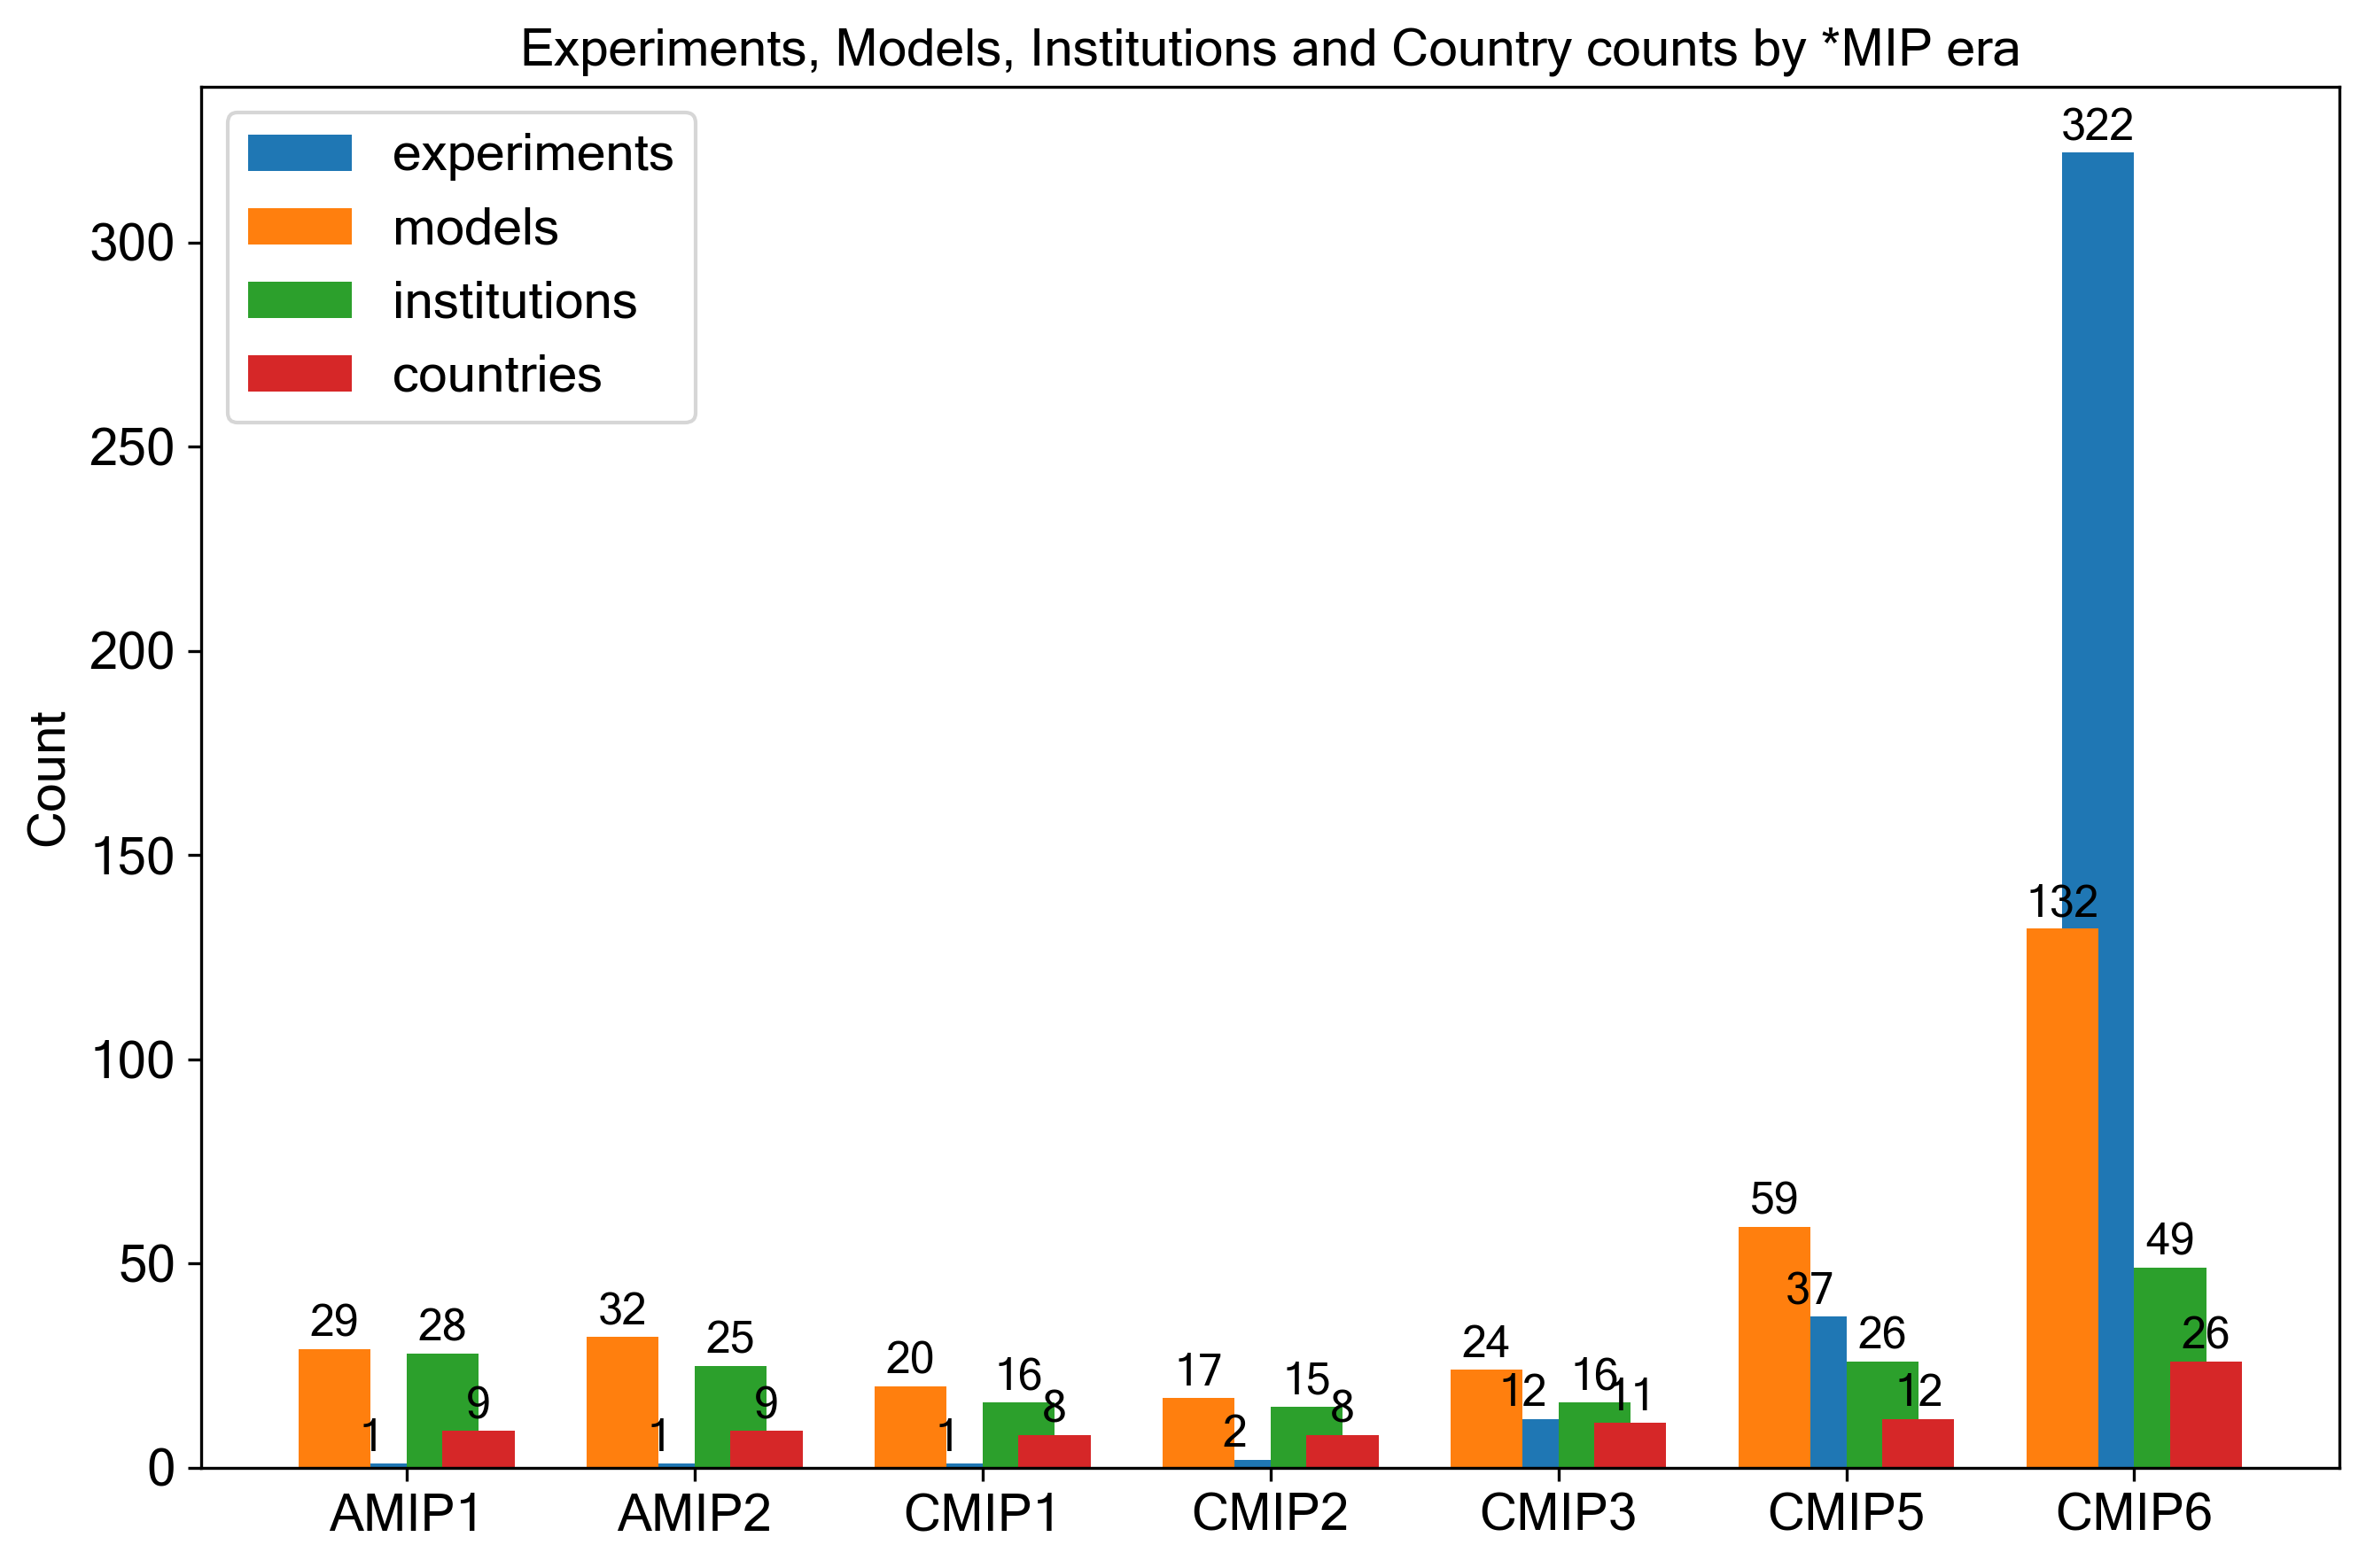

In [4]:
# set inputs
x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars
fontName = "Microsoft Sans Serif"
fontSize = 14
offset = 0.5

# initialize canvas
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)

# plot
rects1 = ax.bar(x - width * offset, experiments, width, label="experiments")
rects3 = ax.bar(x - width, models, width, label="models")
rects2 = ax.bar(x + width * offset, institutions, width, label="institutions")
rects4 = ax.bar(x + width, countries, width, label="countries")
# rects5 = ax.bar(x + width*1.5, forcingCountsBlank, width, label="forcings (DECK/historical only - no *MIPs considered)")

# pretty things up - add text for labels, title, custom x-axis tick labels, etc.
ax.set_title(
    "Experiments, Models, Institutions and Country counts by *MIP era",
    fontname=fontName,
    fontsize=fontSize,
)
ax.set_ylabel("Count", fontname=fontName, fontsize=fontSize)
plt.yticks(fontname=fontName, fontsize=fontSize)
ax.set_xticks(x, labels, fontname=fontName, fontsize=fontSize)
ax.legend(prop={"family": fontName, "size": fontSize})

# label cleanup
padding = 1
labelSize = 12

ax.bar_label(rects1, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects2, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects3, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects4, padding=padding, fontname=fontName, fontsize=labelSize)
# ax.bar_label(rects5, padding=padding, fontname=fontName, fontsize=labelSize)  # forcing

# fill canvas
fig.tight_layout()

# display, save, and close
plt.show()
fig.savefig("_".join([timeFormat, "Fig1.svg"]), format="svg")

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure 2: CMIP6 project growth over time <a class="anchor" id="fig2"></a>

### process input data

In [5]:
import csv
import glob

# read data
csvFiles = glob.glob(os.path.join("250121", "*_datasets_*_footprint_CMIP6_*.csv"))
csvFiles.sort()

# create dictionary
files = {}
for count, actId in enumerate(csvFiles):
    actIdSplit = actId.split("_")
    dates = actIdSplit[-1].split("-")[-1].split(".")[0]
    year = int(dates[0:4])
    month = int(dates[4:6])
    day = int(dates[-2:])
    files[actIdSplit[-2]] = actId

actCount = len(files) + 2  # Add missing MIPs (8 DynVarMIP, 20 SIMIP)

startTime = datetime.date(2018, 7, 2)
endTime = datetime.date(int(year), int(month), int(day))
times = endTime - startTime  # days=642

dateList = [startTime + datetime.timedelta(days=x) for x in range(times.days)]
dateCount = len(dateList)

# create numpy array
arr2 = np.zeros([dateCount, actCount + 1])
for count, x in enumerate(dateList):
    arr2[count, 0] = x.toordinal()

# read CSV
offset = 0  # initialize variable
for count, filePath in enumerate(files):
    print(count, filePath, files[filePath])
    tmpTime = []
    tmpCount = []
    with open(files[filePath]) as csvfile:
        tmp = csv.reader(csvfile, delimiter=",")
        for row in tmp:
            if row[0] == "date":
                continue
            year, month, day = row[0].split("-")
            day = day.split(" ")[0]
            tmpTime.append(datetime.date(int(year), int(month), int(day)))
            tmpCount.append(row[1])

    # Compare time axes
    inds = np.intersect1d(dateList, tmpTime, assume_unique=True, return_indices=True)
    intersects, dateListInd, tmpTimeInd = inds

    if count in [0, 8, 19]:  # Deal with missing 8 DynVarMIP, 20 SIMIP
        offset = offset + 1
        print("offset:", offset)
    for dateMatch, x in enumerate(dateList):
        for dateMatch2, y in enumerate(tmpTime):
            # Catch case where times match
            if x == y:
                arr2[dateMatch, count + offset] = tmpCount[dateMatch2]
                break
            # Catch case where no match, use previous timestamp value
            elif dateMatch2 == len(tmpTime) - 1:
                arr2[dateMatch, count + offset] = arr2[dateMatch - 1, count + offset]

print("input CMIP6 publication data processed")

0 CMIP6 250121/250121_esgf_datasets_publication_cumulative_data_footprint_CMIP6_20180701-20250121.csv
offset: 1
1 AerChemMIP 250121/250121_esgf_datasets_publication_cumulative_data_footprint_CMIP6_AerChemMIP_20180701-20250121.csv
2 C4MIP 250121/250121_esgf_datasets_publication_cumulative_data_footprint_CMIP6_C4MIP_20180701-20250121.csv
3 CDRMIP 250121/250121_esgf_datasets_publication_cumulative_data_footprint_CMIP6_CDRMIP_20180701-20250121.csv
4 CFMIP 250121/250121_esgf_datasets_publication_cumulative_data_footprint_CMIP6_CFMIP_20180701-20250121.csv
5 CMIP 250121/250121_esgf_datasets_publication_cumulative_data_footprint_CMIP6_CMIP_20180701-20250121.csv
6 DAMIP 250121/250121_esgf_datasets_publication_cumulative_data_footprint_CMIP6_DAMIP_20180701-20250121.csv
7 DCPP 250121/250121_esgf_datasets_publication_cumulative_data_footprint_CMIP6_DCPP_20180701-20250121.csv
8 FAFMIP 250121/250121_esgf_datasets_publication_cumulative_data_footprint_CMIP6_FAFMIP_20180701-20250121.csv
offset: 2
9 GM

### plot

PBe15: 1125899906842624
TBe15: 1099511627776
yticks: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
ylabels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13)]
CMIP6 total 'latest' datasets (TeraByte, 1e12): 12240
dateList[0]: 2018-07-02


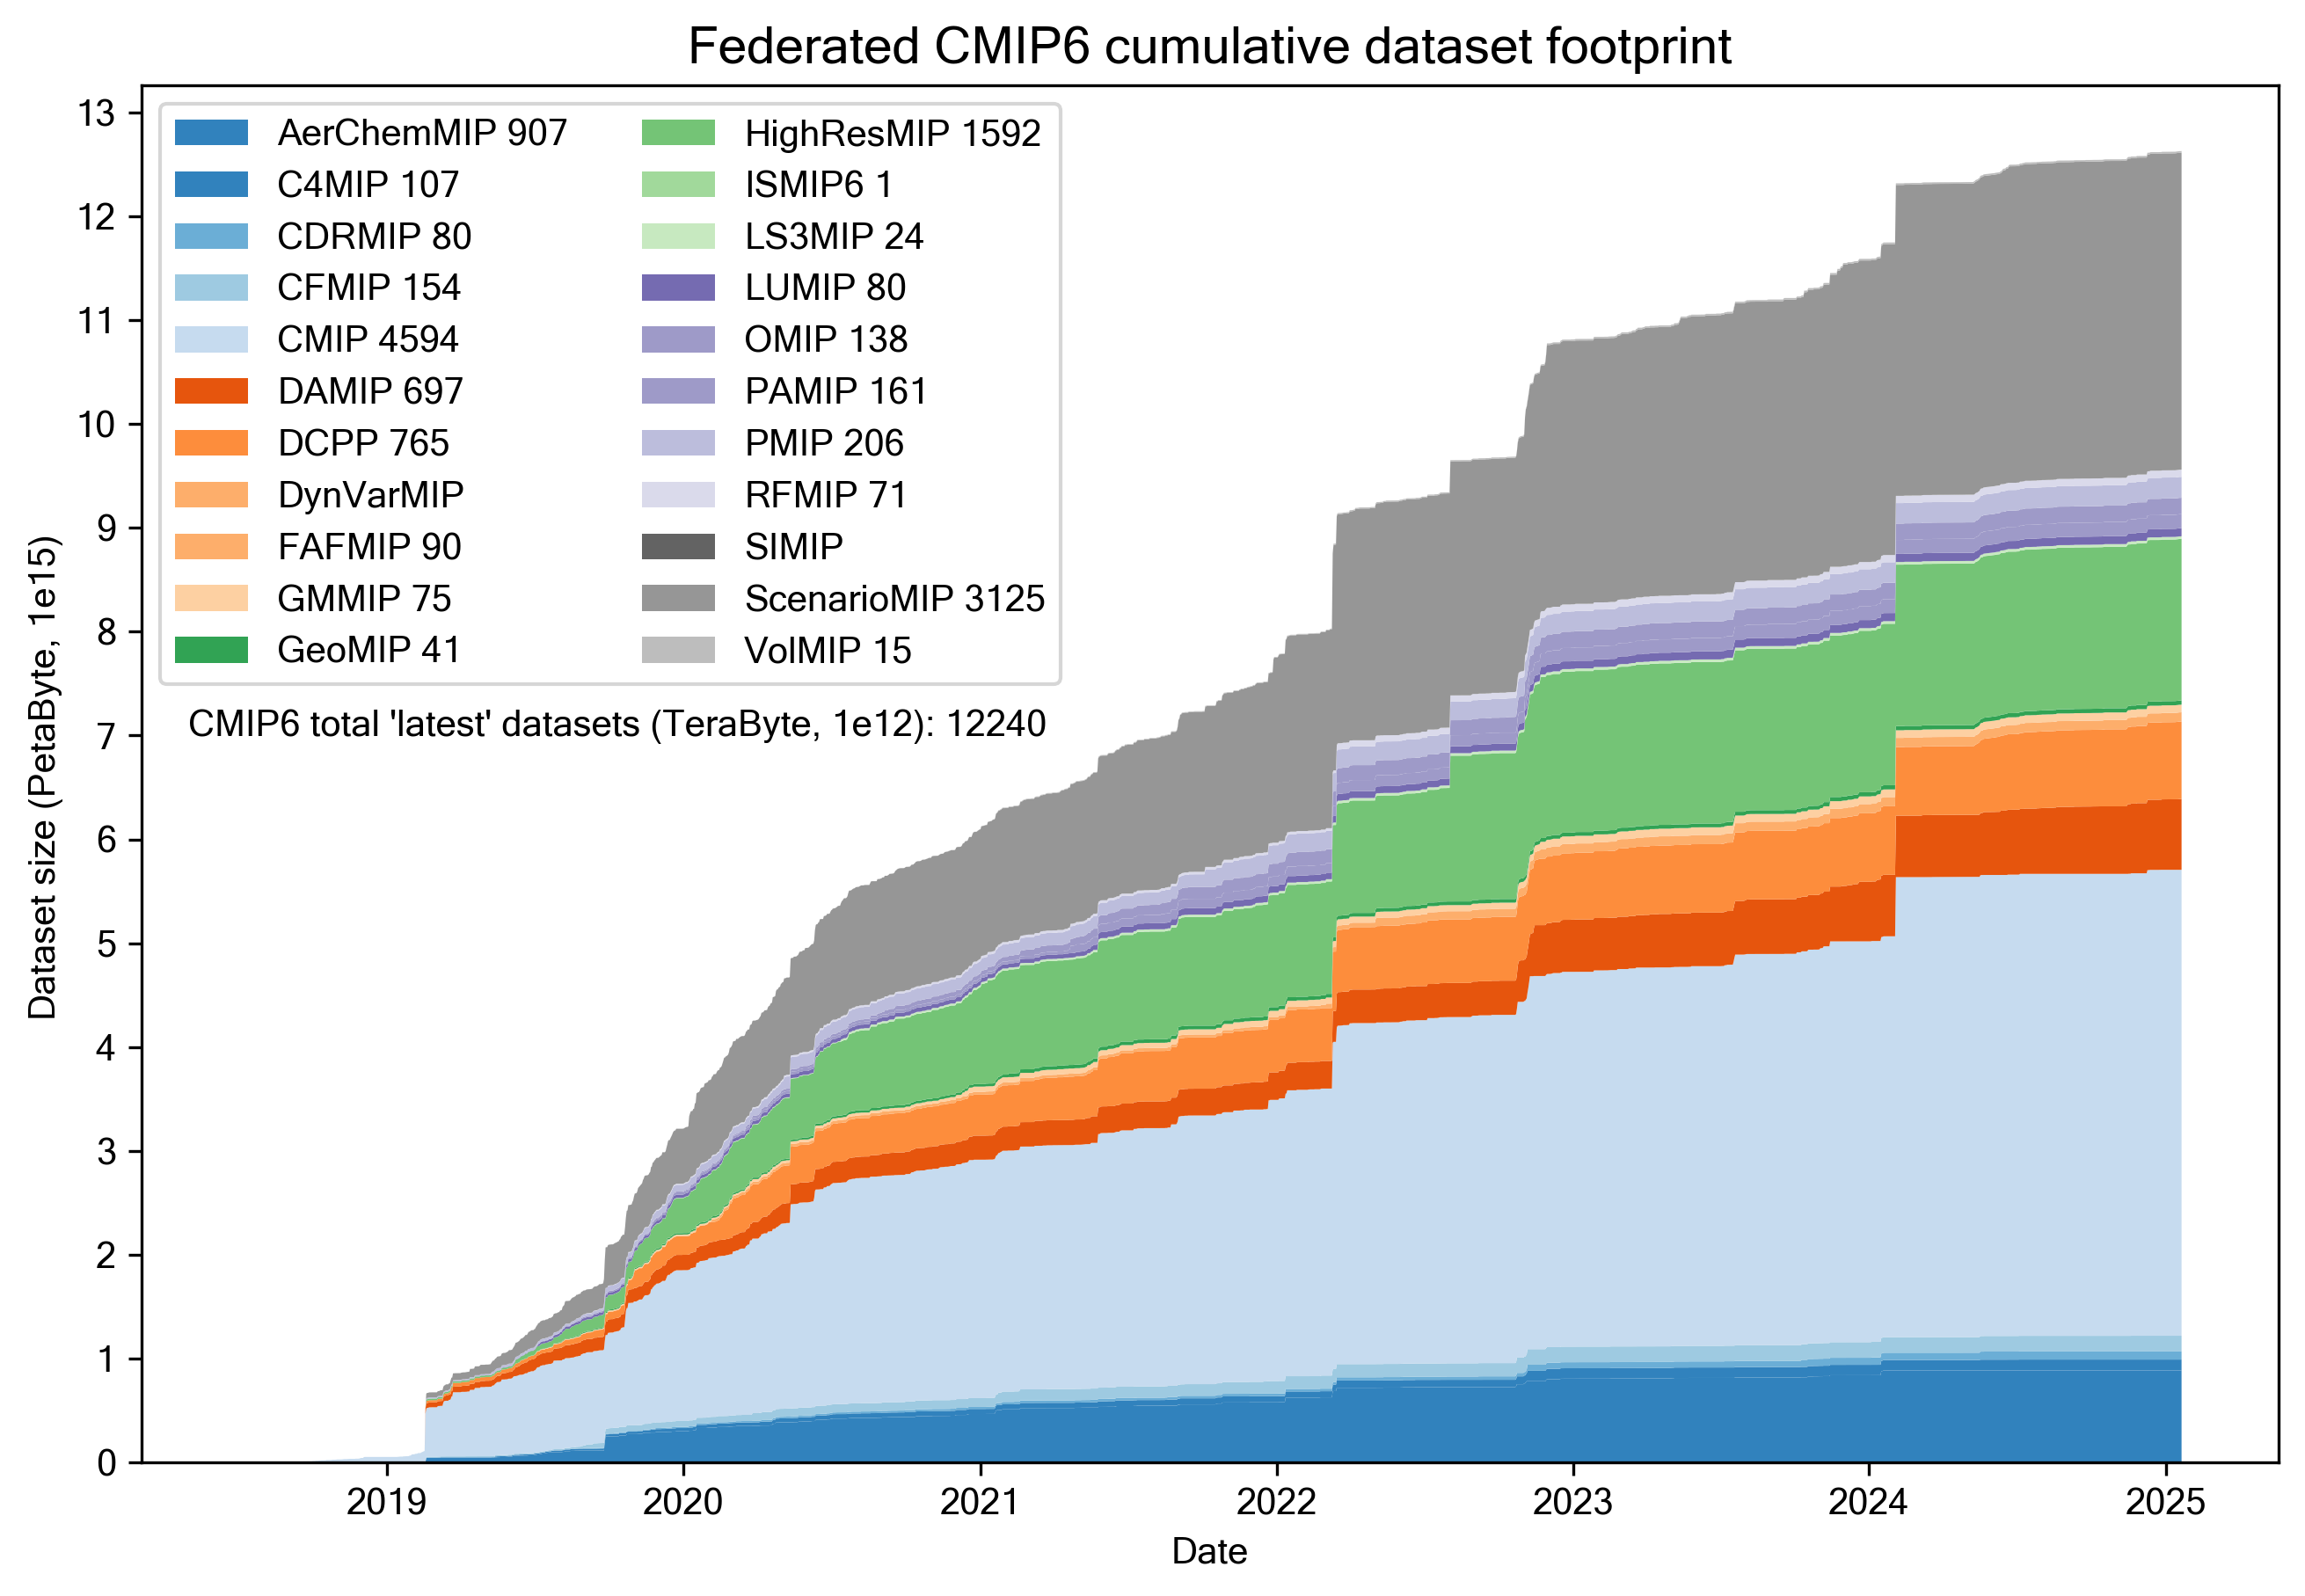

In [6]:
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, date2num

# create plot inputs
fontName = "Microsoft Sans Serif"
xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)
fontSize = 14

# Setup variables
# time axis and arrays
x = date2num(dateList)
y = arr2[:, 2:]  # Omit CMIP6 cumulative
PBe15 = np.power(1024, 5)  # replace 1e15
print("PBe15:", PBe15)
TBe12 = np.power(1024, 4)  # replace 1e12
print("TBe15:", TBe12)
y = y / PBe15  # 1e15  # Scale from bytes to PB 10^15
y = y.swapaxes(0, 1)

# Legend labels
actLabels = []
offset = 1
for count, val in enumerate(list(files.keys())):
    if val == "CMIP6":
        continue  # Skip totals
    if count == 8:
        actLabels.append("DynVarMIP")
        offset = offset + 1
        pass
    if count == 19:
        actLabels.append("SIMIP")
        offset = offset + 1
        pass

    actLabels.append(" ".join([val, str(int(arr2[-1, count + offset] / TBe12))]))

# Basic stacked area chart.
fig = plt.figure(figsize=(9, 6), dpi=300)  # Defaults to 6.4,4.8
ax = plt.subplot(1, 1, 1)
ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(xtick_formatter)

# Create colour lookup
# https://stackoverflow.com/questions/8389636/creating-over-20-unique-legend-colors-using-matplotlib
NUM_COLORS = 23
colList = []
# https://matplotlib.org/tutorials/colors/colormaps.html#classes-of-colormaps
cm = plt.get_cmap("gist_rainbow")
cm = plt.get_cmap("tab20c")  # also tab 20b, tab20
for i in range(NUM_COLORS):
    colList.append(cm(1.0 * i / NUM_COLORS))
plt.stackplot(x, y, labels=actLabels, colors=colList)
leg2 = plt.legend(loc="upper left", ncol=2, prop={"family": fontName, "size": 10})
title = "".join(
    [
        "Federated CMIP6 cumulative dataset footprint"  # (Updated: ",
        # timeNow.strftime("%Y-%m-%d"),
        # ")",
    ]
)
ax.set_title(
    title,
    fontname=fontName,
    fontsize=fontSize,
)
plt.xlabel("Date", fontname=fontName)
plt.ylabel("Dataset size (PetaByte, 1e15)", fontname=fontName)
yticks = np.arange(0, 14, 1)
ylabels = []

for count, val in enumerate(yticks):
    ylabels.append(val)
print("yticks:", yticks)
print("ylabels:", ylabels)
plt.xticks(fontname=fontName)
plt.yticks(yticks, ylabels, fontname=fontName)
plt.subplots_adjust(left=0.06, right=0.96, bottom=0.08, top=0.95, wspace=0, hspace=0)
anoStr = "".join(
    ["CMIP6 total 'latest' datasets (TeraByte, 1e12): ", str(int(arr2[-1, 1] / TBe12))]
)
print(anoStr)
dateTweak = date2num(datetime.date(2018, 5, 1))
datasetNumTweak = 7
plt.annotate(
    anoStr,
    xy=(dateTweak, datasetNumTweak),
    xytext=(dateTweak, datasetNumTweak),
    fontname=fontName,
)
print("dateList[0]:", dateList[0])
fig.savefig("_".join([timeFormat, "Fig2.svg"]), format="svg")
fig.savefig("_".join([timeFormat, "Fig2.png"]), dpi=300)

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure 3: Web of Science (WoS) citations for MIP overview papers <a class="anchor" id="fig3"></a>

### pull data - Overview and ARs

In [7]:
%%time
# create a filled pad list based on FANGIO 1990 published, 1991 citation to present
currentYr = datetime.date.today().year
tmp = np.arange(1990, currentYr+1)  # 1990:2025
citingYrsPad = [np.nan]*len(tmp)
print("len(citingYrsPad):", len(citingYrsPad), "len(tmp):", len(tmp))

data = {
    "key": ["strId", "DOI", "WoSId", "GSchId"],
    "charneyG": ["US Nat. Res. Counc. (Charney et al., 1979)", "10.17226/12181", "", "15553179873625400927"],
    "fangio": ["FANGIO (Cess et al., 1990)", "10.1029/JD095iD10p16601", "A1990EB20200022", "6135992129360534519"],
    "ar1": ["FAR Ch4 (Gates et al., 1990)", "", "000519742200007", "7713434728424104172"],
    "amip1": ["AMIP1 (Gates et al., 1992)", "10.1175/1520-0477(1992)073<1962:ATAMIP>2.0.CO;2", "A1992KD66500003", "7578705778036429828"],
    "cmip1": ["CMIP1 (Meehl et al., 1995)", "10.1175/1520-0477-76.6.951", "A1995RG21000008", "4747560697990877468"],
    "ar2": ["SAR Ch5 (Gates et al., 1995)", "", "000538713700009", "16792993830758929937"],
    "ar3": ["TAR Ch8 (McAvaney et al., 2001)", "", "000538687900012", "14462291162561266477"],
    "cmip2": ["CMIP2 (Meehl et al., 2005)", "10.1175/BAMS-86-1-89", "000226970100024", "414872318861866058"],
    "cmip3": ["CMIP3 (Meehl et al., 2007)", "10.1175/BAMS-88-9-1383", "000250166400004", "10102268002781422381"],
    "ar4": ["AR4 Ch8 (Randall et al., 2007)", "", "000538686200012", "14750900660436683651"],
    "cmip5": ["CMIP5 (Taylor et al., 2012)", "10.1175/BAMS-D-11-00094.1", "000303110900004", "6589368678432360376"],
    "ar5": ["AR5 Ch9 (Flato et al., 2013)", "10.1017/CBO9781107415324.020", "000368114000013", "6766149182177097103"],
    "cmip6": ["CMIP6 (Eyring et al., 2016)", "10.5194/gmd-9-1937-2016", "000376937800013", "5319430665468485905"],
    "ar6": ["AR6 Ch3 (Eyring et al., 2021)", "10.1017/9781009157896.005", "", "1626781721612853877"],
}

dataDic = {}
for count, key in enumerate(data.keys()):
    if key == "key":
        continue
    dataDic[key] = {}
    if key in ["charneyG", "ar6"]:
        dataDic[key]["wos"] = []
        dataDic[key]["wosPad"] = []
        gcites = grabGoogleScholarCites(data[key][3])
        dataDic[key]["gsch"] = gcites
        continue
    print(count, key)
    # process WoS requests
    pubYr, _, noPad, pad, _, citeStartYr, citeEndYr = pullStats(data[key][2], data[key][1], citingYrsPad)
    dataDic[key]["wos"] = noPad
    dataDic[key]["wosPad"] = pad
    dataDic[key]["citePubStartEndYr"] = [pubYr, citeStartYr, citeEndYr]
    gcites = grabGoogleScholarCites(data[key][3]) ### gcites = 0 ###
    dataDic[key]["gsch"] = gcites

"""
Notes
# Charney National Research Council, 1979 National Academies Press
# https://doi.org/10.17226/12181
# https://scholar.google.com/scholar?cluster=15553179873625400927&hl=en&as_sdt=0,5
charneyG = grabGoogleScholarCites("10.17226/12181")
# FANGIO Cess et al., 1990 JGR
# https://doi.org/10.1029/JD095iD10p16601
# https://www.webofscience.com/wos/woscc/full-record/WOS:A1990EB20200022
# https://scholar.google.com/scholar?cluster=6135992129360534519&hl=en&as_sdt=0,5
pubYr, _, noPad, pad, _, citeStartYr, citeEndYr = pullStats("A1990EB20200022", "10.1029/JD095iD10p16601", citingYrsPad)
#fangioG = grabGoogleScholarCites("10.1029/JD095iD10p16601")
"""
print("Fangio, AMIP, CMIP phases, ARs data pull complete")

len(citingYrsPad): 36 len(tmp): 36
Processing GS: JG Charney, A Arakawa, DJ Baker, B Bolin…   762
2 fangio
Processing WoS: CESS et al. 1990
Current year: 2025 total citations: 3
Processing GS: JP Blanchet   1162
3 ar1
Processing WoS: Gates et al. 1990
Processing GS: WL Gates, PR Rowntree, QC Zeng   162
4 amip1
Processing WoS: GATES  1992
Current year: 2025 total citations: 1
Processing GS: WL Gates   1625
5 cmip1
Processing WoS: MEEHL  1995
Current year: 2025 total citations: 1
Processing GS: GA Meehl   70
6 ar2
Processing WoS: Gates et al. 1995
Processing GS: researchgate.net   203
7 ar3
Processing WoS: McAvaney et al. 2001
Current year: 2025 total citations: 1
Processing GS: C Covey, S Joussaume, V Kattsov, A Kitoh…   322
8 cmip2
Processing WoS: Meehl et al. 2005
Processing GS: GA Meehl et al.  383
9 cmip3
Processing WoS: Meehl et al. 2007
Current year: 2025 total citations: 7
Processing GS: GA Meehl et al.  3483
10 ar4
Processing WoS: Randall et al. 2007
Current year: 2025 total cit

### pull data - Community MIPs

In [8]:
%%time
# create a filled pad list based on FANGIO 1990 published, 1991 citation to present
currentYr = datetime.date.today().year
tmp = np.arange(1990, currentYr+1)  # 1990:2025
padLen = len(dataDic["fangio"]["wosPad"])  # 36 (2025)
citingYrsPad = [np.nan]*padLen
# CMIP6 MIPs - https://gmd.copernicus.org/articles/special_issue590.html + CDRMIP + ?
data = {
    "key": ["strId", "DOI", "WoSId", "GSchId"],
    "aerchemmip": ["AerChemMIP (Collins et al., 2017)", "10.5194/gmd-10-585-2017", "000395391000001", "2228431425692054239"],
    "c4mip": ["C4MIP (Jones et al., 2016)", "10.5194/gmd-9-2853-2016", "000383844500002", "15965828944833123479"],
    "cdrmip": ["CDRMIP (Keller et al., 2018)", "10.5194/gmd-11-1133-2018", "000428836100001", "15005249820465140731"],
    "cfmip": ["CFMIP (Webb et al., 2017)", "10.5194/gmd-10-359-2017", "000395187500001", "5130787364716430992"],  # first entry str, fix
    "cordex": ["CORDEX (Gutowski et al., 2016)", "10.5194/gmd-9-4087-2016", "000387989000001", "16396424795090846989"],
    "damip": ["DAMIP (Gillett et al., 2016)", "10.5194/gmd-9-3685-2016", "000386585100001", "939511170020131986"],
    "dcpp": ["DCPP (Boer et al., 2016)", "10.5194/gmd-9-3751-2016", "000387064200001", "4358958571700544295"],
    "dynvarmip": ["DynVarMIP (Gerber & Manzini, 2016)", "10.5194/gmd-9-3413-2016", "000384624000001", "3382763899960592148"],
    "fafmip": ["FAFMIP (Gregory et al., 2016)", "10.5194/gmd-9-3993-2016", "000387988500001", "7225289619110837959"],
    "geomip6": ["GeoMIP6 (Kravitz et al., 2015)", "10.5194/gmd-8-3379-2015", "000364326200024", "8582100925734170406"],
    "gmmip": ["GMMIP (Zhou et al., 2016)", "10.5194/gmd-9-3589-2016", "000385387800001", "9914773987014836629"],
    "highresmip": ["HighResMIP (Haarsma et al., 2016)", "10.5194/gmd-9-4185-2016", "000388191000002", "8351405550326088024"],
    "ismip6": ["ISMIP6 (Nowicki et al., 20176)", "10.5194/gmd-9-4521-2016", "000391579600002", "8537877691920472431"],
    "ls3mip": ["LS3MIP (van den Hurk et al., 2016)", "10.5194/gmd-9-2809-2016", "000383800400002", "17977350563028557335"],
    "lumip": ["LUMIP (Lawrence et al., 2016)", "10.5194/gmd-9-2973-2016", "000383892800002", "10557369061243505767"],
    "omip": ["OMIP-Phys. (Griffies et al., 2016)", "10.5194/gmd-9-3231-2016", "000384321500001", "3376941097491308409"],  # first entry str, fix
    "omip2": ["OMIP-BGC (Orr et al., 2017)", "10.5194/gmd-10-2169-2017", "000403231800001", "1338574606670727279"],
    "pamip": ["PAMIP (Smith et al., 2019)", "10.5194/gmd-12-1139-2019", "000462352700002", "3209841521107572530"],
    "pmip4": ["PMIP4 (Kageyama et al., 2018)", "10.5194/gmd-11-1033-2018", "000427841800004", "4430255073988038523"],
    #"pmip4-2": ["PMIP4-2 (Otto-Bliesner et al., 2017)", "10.5194/gmd-10-3979-2017", "", "2244946372481121692"],
    #"pmip4-3": ["PMIP4-3 (Jungclaus et al., 2017)", "10.5194/gmd-10-4005-2017", "", "9830116883221272631"],
    #"pmip4-4": ["PMIP4-4 (Kageyama et al., 2017)", "10.5194/gmd-10-4035-2017", "", "11445150179100991970"],
    #"pmip4-5": ["PMIP4-5 (Kageyama et al., 2021)", "10.5194/cp-17-1065-2021", "", "8634300561675875587"],
    "rfmip": ["RFMIP (Pincus et al., 2016)", "10.5194/gmd-9-3447-2016", "000385385300001", "17546430196727116618"],
    "scenariomip": ["ScenarioMIP (O'Neill et al., 2016)", "10.5194/gmd-9-3461-2016", "000385385700001", "12254973154230284458"],
    "simip": ["SIMIP (Notz et al., 2016)", "10.5194/gmd-9-3427-2016", "000384624000002", "15593573766407982237"],
    "viacsab": ["VIACS AB (Ruane et al., 2016)", "10.5194/gmd-9-3493-2016", "000385386000002", "6116334735342527444"],
    "volmip": ["VolMIP (Zanchettin et al., 2016)", "10.5194/gmd-9-2701-2016", "000383794200001", "3384046088338006252"],
    "zecmip": ["ZECMIP (Collins et al., 2019)", "10.5194/gmd-12-4375-2019", "000490550000001", "12415058673140439655"],
    "covidmip": ["CovidMIP (Lamboll et al., 2021)", "10.5194/gmd-14-3683-2021", "000665538700002", "15712557263970835869"],
    "covidmip2": ["CovidMIP (Jones et al., 2021)", "10.1029/2020GL091883", "000672324900006", "4763600016023344623"],  # gsch issue, use DOI
}

for count, key in enumerate(data.keys()):
    if key == "key":
        continue
    dataDic[key] = {}
    print(count, key)
    # process WoS requests
    pubYr, _, noPad, pad, _, citeStartYr, citeEndYr = pullStats(data[key][2], data[key][1], citingYrsPad)
    dataDic[key]["wos"] = noPad
    dataDic[key]["wosPad"] = pad
    dataDic[key]["citePubStartEndYr"] = [pubYr, citeStartYr, citeEndYr]
    gcites = grabGoogleScholarCites(data[key][3]) ### gcites = 0 ###
    dataDic[key]["gsch"] = gcites

print("CMIP6 Community MIP data pull complete")

1 aerchemmip
Processing WoS: Collins et al. 2017
Current year: 2025 total citations: 7
Processing GS: WJ Collins et al.  196
2 c4mip
Processing WoS: Jones et al. 2016
Current year: 2025 total citations: 3
Processing GS: CD Jones et al.  199
3 cdrmip
Processing WoS: Keller et al. 2018
Current year: 2025 total citations: 3
Processing GS: DP Keller et al.  151
4 cfmip
Processing WoS: Webb et al. 2017
**case citeStartYr < pubYr
Current year: 2025 total citations: 5
Processing GS: MJ Webb et al.  227
5 cordex
Processing WoS: Gutowski et al. 2016
Current year: 2025 total citations: 7
Processing GS: WJ Gutowski Jr et al.  363
6 damip
Processing WoS: Gillett et al. 2016
Current year: 2025 total citations: 16
Processing GS: NP Gillett et al.  397
7 dcpp
Processing WoS: Boer et al. 2016
Current year: 2025 total citations: 6
Processing GS: GJ Boer, DM Smith, C Cassou…   354
8 dynvarmip
Processing WoS: Gerber et al. 2016
Current year: 2025 total citations: 1
Processing GS: EP Gerber et al.  37
9 f

In [9]:
"""
# back fill gsch data from 250124a.json
with open("250124a.json", "r") as f:
    oldDic = json.load(f)

print("Charney old:", dataDic["charneyG"]["gsch"])
print("amip1 old:", dataDic["amip1"]["gsch"])
for count, key in enumerate(oldDic.keys()):
    print(count, key, oldDic[key]["gsch"])
    dataDic[key]["gsch"] = oldDic[key]["gsch"]
print("Charney new:", dataDic["charneyG"]["gsch"])
print("amip1 new:", dataDic["amip1"]["gsch"])
"""

# write data to tmp.json - for reuse and testing
outJson = "".join([dateFormat, ".json"])
with open(outJson, "w") as f:
    json.dump(
        dataDic, f, ensure_ascii=True, sort_keys=True, indent=4, separators=(",", ":")
    )

### plot

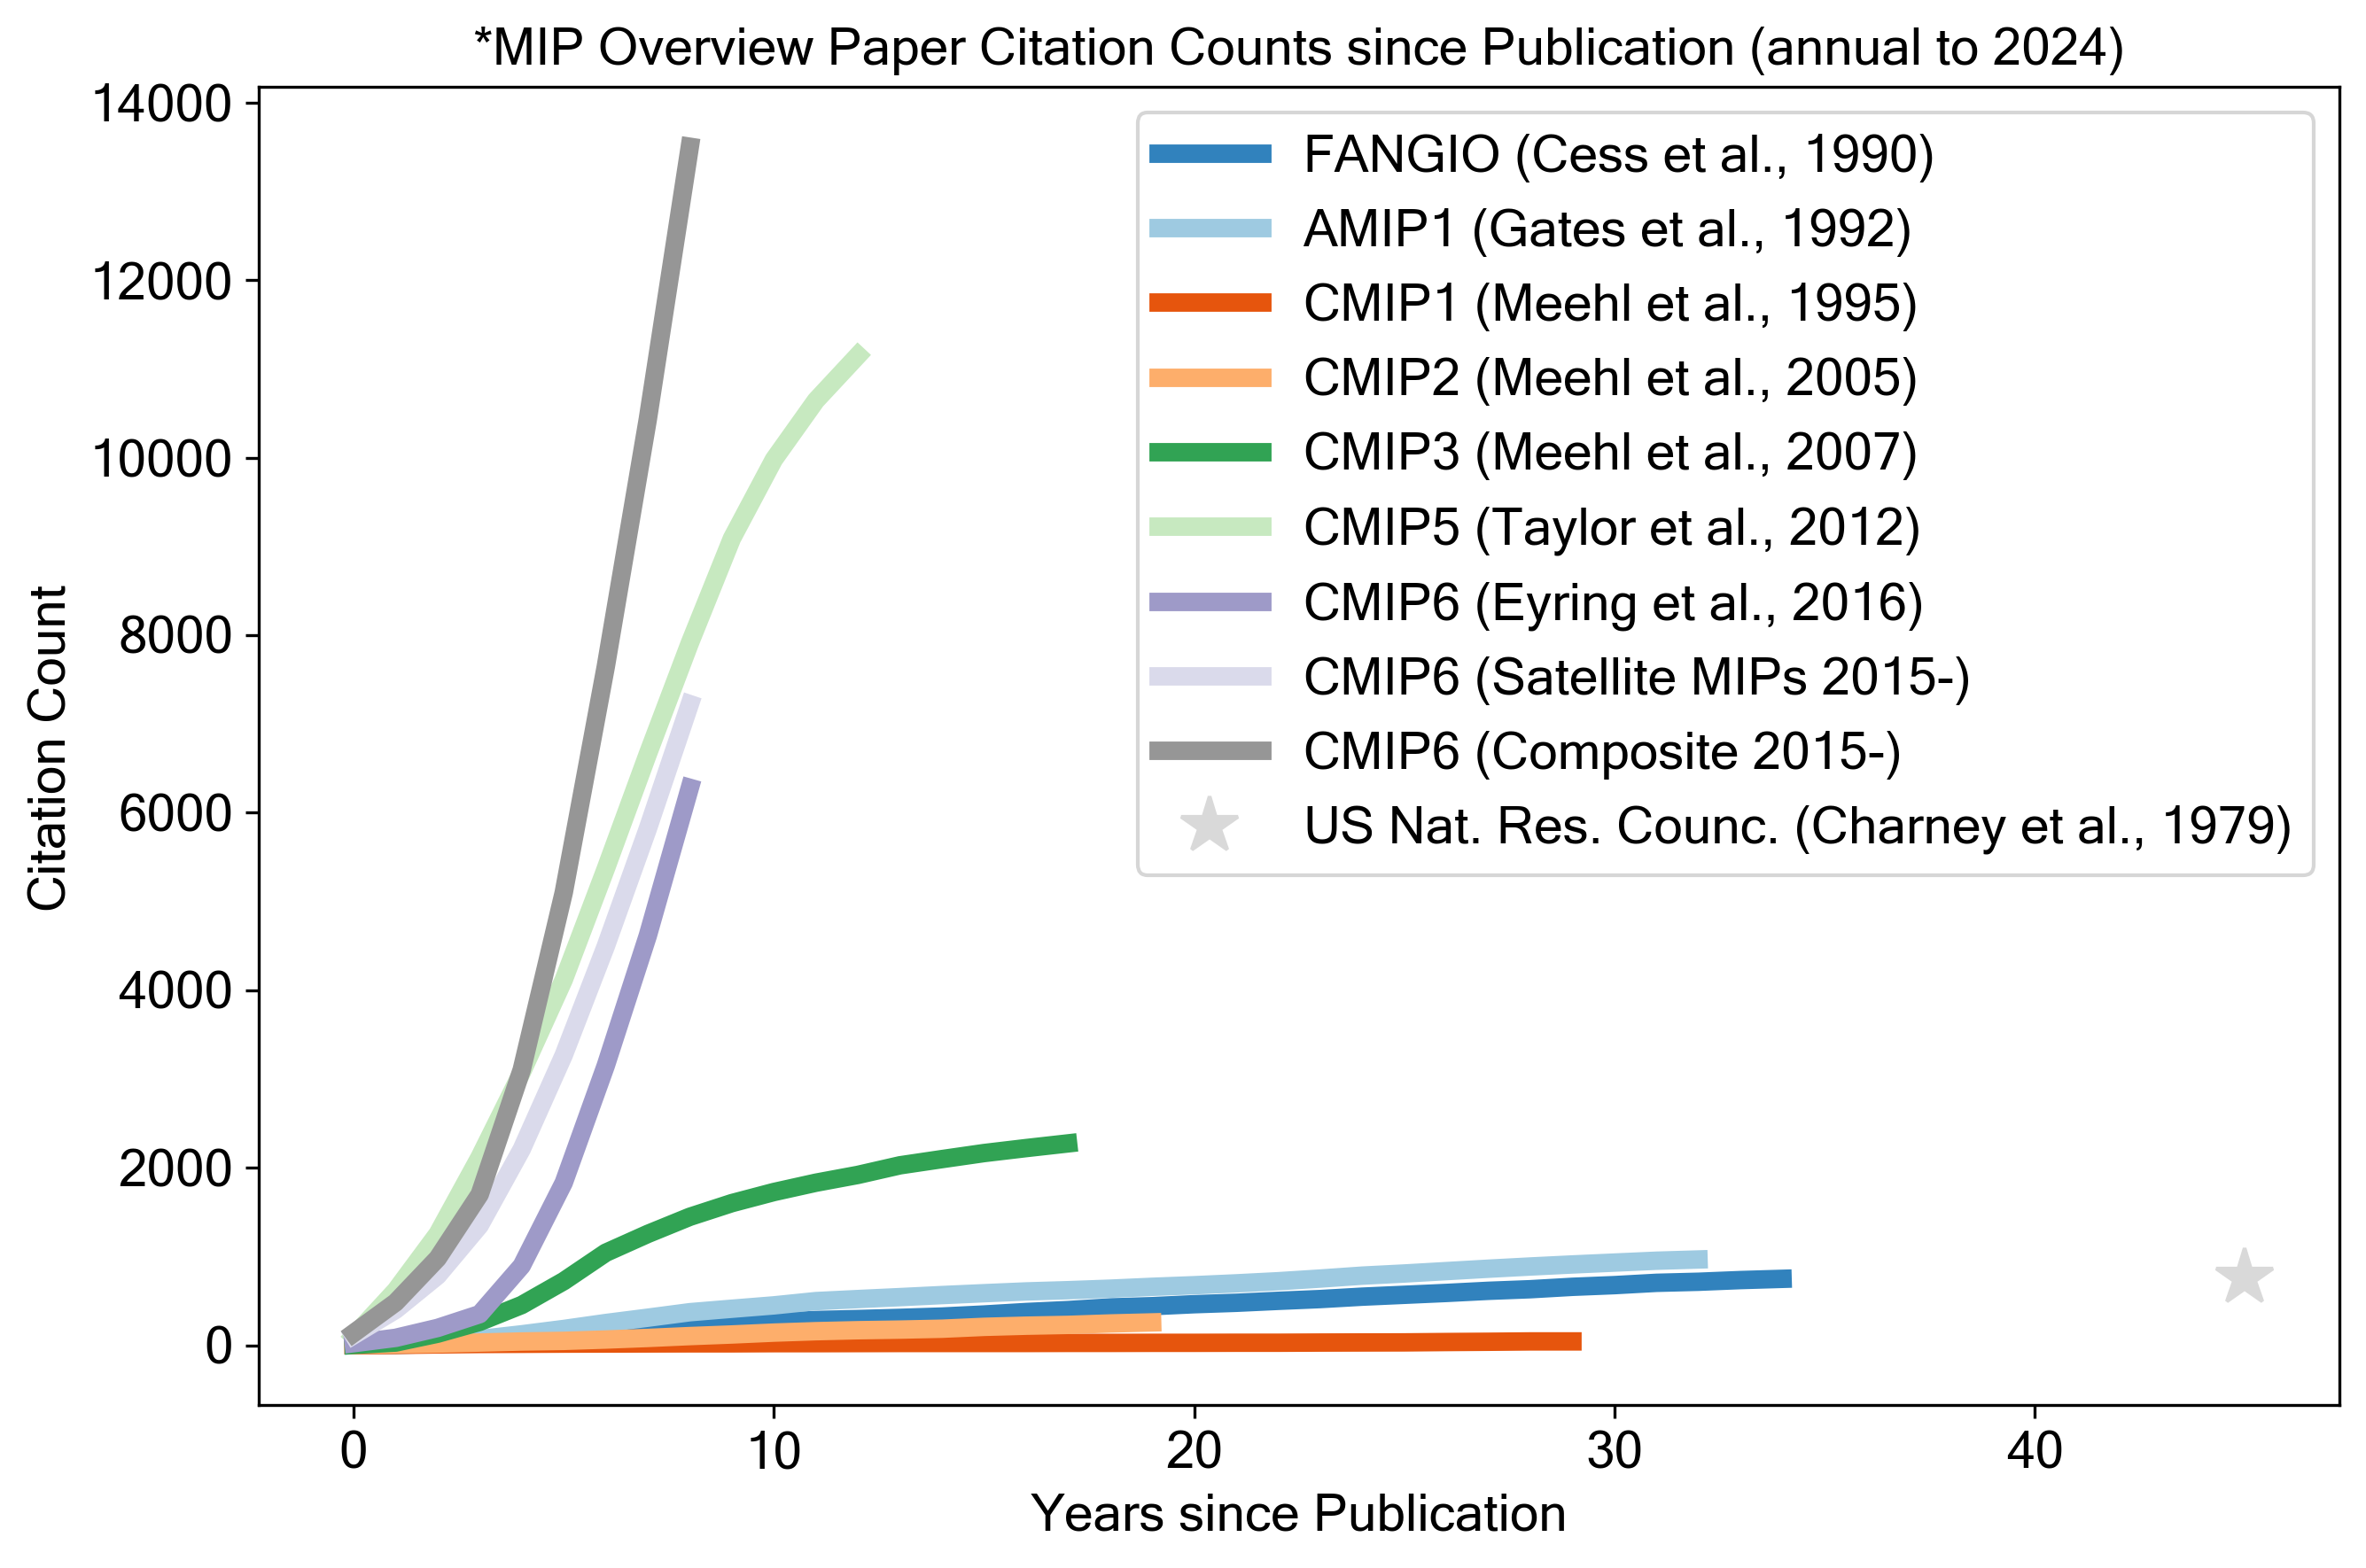

In [10]:
# set inputs
# with open("250124a.json", "r") as f:
#     dataDic = json.load(f)

# set figure defaults
fontSize = 14
lineWidth = 5
fontName = "Microsoft Sans Serif"
currentYr = datetime.date.today().year
# get colour map
cm = plt.get_cmap("tab20c")

# Year since publication - based on longest
yrSincePublication = np.arange(0, len(dataDic["fangio"]["wosPad"]))

# create CMIP6 Community MIPs, Composite totals
mipList = [
    "aerchemmip",
    "c4mip",
    "cdrmip",
    "cfmip",
    "cordex",
    "damip",
    "dcpp",
    "dynvarmip",
    "fafmip",
    "geomip6",
    "gmmip",
    "highresmip",
    "ismip6",
    "ls3mip",
    "lumip",
    "omip",
    "omip2",
    "pamip",
    "pmip4",
    "rfmip",
    "scenariomip",
    "simip",
    "viacsab",
    "volmip",
    "zecmip",
    "covidmip",
    "covidmip2",
]

# Generate composite CMIP6
cmip6Comp, cmip6Compa = [[np.nan] * len(dataDic["fangio"]["wosPad"]) for _ in range(2)]
for count, key in enumerate(mipList):
    # print(count, key)
    # print("cmip6Comp:", len(cmip6Comp), cmip6Comp)
    # print("dataDic[key][""wosPad""]:", len(dataDic[key]["wosPad"]), dataDic[key]["wosPad"])
    cmip6Comp = np.nansum([cmip6Comp, dataDic[key]["wosPad"]], 0)

cmip6Compa[: len(cmip6Comp)] = cmip6Comp
cmip6Comp = cmip6Compa
del cmip6Compa
cmip6CompA = np.nansum([dataDic["cmip6"]["wosPad"], cmip6Comp], 0)
cmip6Comp = np.array(cmip6Comp)
cmip6Comp = np.where(cmip6Comp == 0.0, np.nan, cmip6Comp)
cmip6CompA = np.where(cmip6CompA == 0.0, np.nan, cmip6CompA)
# print("cmip6Comp:", np.nansum(cmip6Comp), cmip6Comp)
# print("cmip6CompA:", np.nansum(cmip6CompA), cmip6CompA)
# cleanup leaked 2025 values - cause of flat last years (cmip6)
yrs = np.arange(2016, 2025)
# print(len(yrs), yrs)
# print(len(cmip6Comp), cmip6Comp)

# trim off currentYr/2025 value for all entries
fangio = dataDic["fangio"]["wosPad"]
fangio[currentYr - 1990] = np.nan
amip1 = dataDic["amip1"]["wosPad"]
amip1[currentYr - 1992] = np.nan
cmip1 = dataDic["cmip1"]["wosPad"]
cmip1[currentYr - 1995] = np.nan
cmip2 = dataDic["cmip2"]["wosPad"]
cmip2[currentYr - 2005] = np.nan
cmip3 = dataDic["cmip3"]["wosPad"]
cmip3[currentYr - 2007] = np.nan
cmip5 = dataDic["cmip5"]["wosPad"]
cmip5[currentYr - 2012] = np.nan  # 13 = 2025
cmip6 = dataDic["cmip6"]["wosPad"]
cmip6[currentYr - 2016] = np.nan  # 9 = 2025
cmip6Comp[currentYr - 2016] = np.nan
cmip6CompA[currentYr - 2016] = np.nan
# print("cmip6Comp:", np.nansum(cmip6Comp), cmip6Comp)
# print("cmip6CompA:", np.nansum(cmip6CompA), cmip6CompA)

# initialize canvas
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)

# plot from year 1
line0 = plt.plot(
    yrSincePublication,
    np.cumsum(fangio),
    linewidth=lineWidth,
    label="FANGIO (Cess et al., 1990)",
)  #
# lineA = plt.plot(yrSincePublication, np.cumsum(dataDic["ar1"]["wosPad"]), linewidth=lineWidth, label="FAR (Gates et al., 1990)") # 55 - missing most years
line1 = plt.plot(
    yrSincePublication,
    np.cumsum(amip1),
    linewidth=lineWidth,
    label="AMIP1 (Gates et al., 1992)",
)  #
line2 = plt.plot(
    yrSincePublication,
    np.cumsum(cmip1),
    linewidth=lineWidth,
    label="CMIP1 (Meehl et al., 1995)",
)  #
# lineB = plt.plot(yrSincePublication, np.cumsum(dataDic["ar2"]["wosPad"]), linewidth=lineWidth, label="SAR (Gates et al., 1995)") # 23 - missing most years
# lineC = plt.plot(yrSincePublication, np.cumsum(dataDic["ar3"]["wosPad"]), linewidth=lineWidth, label="TAR (McAvaney et al., 2001)") # 154 - missing most years
line3 = plt.plot(
    yrSincePublication,
    np.cumsum(cmip2),
    linewidth=lineWidth,
    label="CMIP2 (Meehl et al., 2005)",
)  #
line4 = plt.plot(
    yrSincePublication,
    np.cumsum(cmip3),
    linewidth=lineWidth,
    label="CMIP3 (Meehl et al., 2007)",
)  #
# lineD = plt.plot(yrSincePublication, np.cumsum(dataDic["ar4"]["wosPad"]), linewidth=lineWidth, label="AR4 (Randall et al., 2007)") # 292 - missing most years
line5 = plt.plot(
    yrSincePublication,
    np.cumsum(cmip5),
    linewidth=lineWidth,
    label="CMIP5 (Taylor et al., 2012)",
)  #
# lineE = plt.plot(yrSincePublication, np.cumsum(dataDic["ar5"]["wosPad"]), linewidth=lineWidth, label="AR5 (Flato et al., 2013)") # 974 - missing most years
line6 = plt.plot(
    yrSincePublication,
    np.cumsum(cmip6),
    linewidth=lineWidth,
    label="CMIP6 (Eyring et al., 2016)",
)  #
line7 = plt.plot(
    yrSincePublication,
    np.cumsum(cmip6Comp),
    linewidth=lineWidth,
    label="CMIP6 (Satellite MIPs 2015-)",
)
line8 = plt.plot(
    yrSincePublication,
    np.cumsum(cmip6CompA),
    linewidth=lineWidth,
    label="CMIP6 (Composite 2015-)",
)
star0 = plt.plot(
    2024 - 1979,
    dataDic["charneyG"]["gsch"],
    marker="*",
    markersize=16,
    linestyle="None",
    label="US Nat. Res. Counc. (Charney et al., 1979)",
)  #

updateLineColours(ax, cm)  # update colour palette

# pretty things up - add text for labels, title, custom x-axis tick labels, etc.
ax.set_title(
    "".join(
        [
            "*MIP Overview Paper Citation Counts since Publication (annual to ",
            str(currentYr - 1),
            ")",
        ]
    ),
    fontname=fontName,
    fontsize=fontSize,
)
ax.set_ylabel("Citation Count", fontname=fontName, fontsize=fontSize)
plt.yticks(fontname=fontName, fontsize=fontSize)
ax.set_xlabel("Years since Publication", fontname=fontName, fontsize=fontSize)
plt.xticks(fontname=fontName, fontsize=fontSize)
ax.legend(prop={"family": fontName, "size": fontSize})
# plt.text(42, -270, ' '.join([timeFormat]), fontsize=5). # dob timestamp

# fill canvas
fig.tight_layout()

# display, save, close
plt.show()
fig.savefig("_".join([timeFormat, "Fig3.svg"]), format="svg")

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure 4: Web of Science (WoS) citations for CMIP6 Community MIP papers <a class="anchor" id="fig4"></a>

### plot

valsum: [np.float64(191.0), np.float64(186.0), np.float64(126.0), np.float64(212.0), np.float64(286.0), np.float64(351.0), np.float64(310.0), np.float64(38.0), np.float64(129.0), np.float64(151.0), np.float64(80.0), np.float64(738.0), np.float64(165.0), np.float64(155.0), np.float64(340.0), np.float64(249.0), np.float64(148.0), np.float64(210.0), np.float64(163.0), np.float64(186.0), np.float64(2623.0), np.float64(81.0), np.float64(33.0), np.float64(142.0), np.float64(55.0), np.float64(33.0)]
np.nansum(valsum): 7381.0
valsum %: [' 2.59%', ' 2.52%', ' 1.71%', ' 2.87%', ' 3.87%', ' 4.76%', ' 4.20%', ' 0.51%', ' 1.75%', ' 2.05%', ' 1.08%', '10.00%', ' 2.24%', ' 2.10%', ' 4.61%', ' 3.37%', ' 2.01%', ' 2.85%', ' 2.21%', ' 2.52%', '35.54%', ' 1.10%', ' 0.45%', ' 1.92%', ' 0.75%', ' 0.45%']
np.nansum(valsum %): 100.00000000000001
len(valsum): 26 ; len(labs): 26


<timed exec>:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
<timed exec>:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


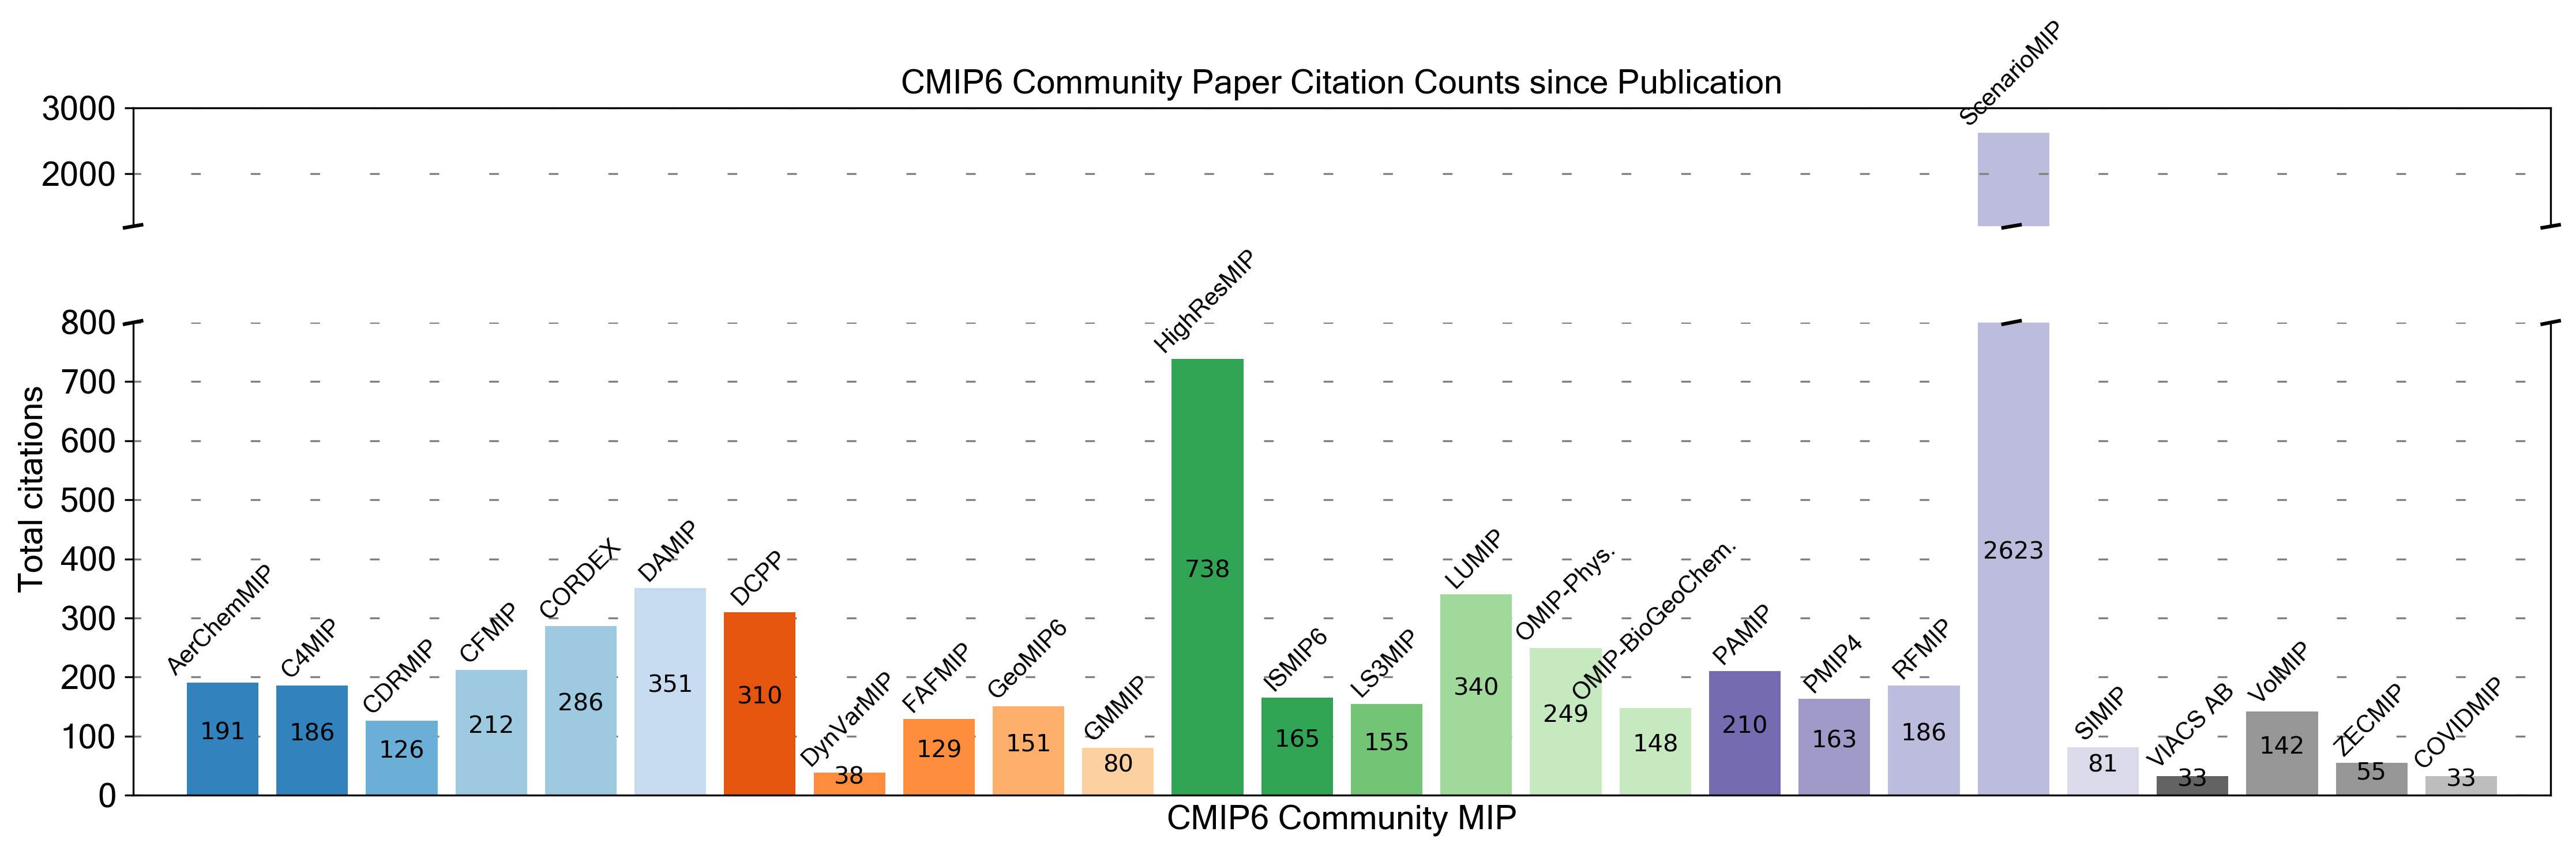

CPU times: user 352 ms, sys: 15.9 ms, total: 368 ms
Wall time: 367 ms


In [11]:
%%time
fig, (ax1, ax2) = plt.subplots(figsize=(15, 5), dpi=300, ncols=1, nrows=2, sharex=True, gridspec_kw={'height_ratios': [1, 4]})

# sort axis boxes
ax1.spines[['bottom']].set_visible(False)
ax2.spines[['top']].set_visible(False)
ax1.set_ylim(1200, 3000) # 2500 max
ax2.set_ylim(0, 800) # 700 max
ax1.set_xlim(-1, 26)
ax2.set_xlim(-1, 26)
fig.tight_layout()

# fixed values
linesty = (1, (5, 26))
rot = 45
fontName = "Microsoft Sans Serif"
fontSize = 14
fontSizeLab = 10

# create colour bins
NUM_COLORS = 27
colList = []
cm = plt.get_cmap('tab20c')  # also tab 20b, tab20
for i in range(NUM_COLORS):
    colList.append(cm(1.*i/NUM_COLORS))

val = [np.nansum(dataDic["aerchemmip"]["wosPad"]),
       np.nansum(dataDic["c4mip"]["wosPad"]),
       np.nansum(dataDic["cdrmip"]["wosPad"]),
       np.nansum(dataDic["cfmip"]["wosPad"]),
       np.nansum(dataDic["cordex"]["wosPad"]),
       np.nansum(dataDic["damip"]["wosPad"]),
       np.nansum(dataDic["dcpp"]["wosPad"]),
       np.nansum(dataDic["dynvarmip"]["wosPad"]),
       np.nansum(dataDic["fafmip"]["wosPad"]),
       np.nansum(dataDic["geomip6"]["wosPad"]),
       np.nansum(dataDic["gmmip"]["wosPad"]),
       np.nansum(dataDic["highresmip"]["wosPad"]),
       np.nansum(dataDic["ismip6"]["wosPad"]),
       np.nansum(dataDic["ls3mip"]["wosPad"]),
       np.nansum(dataDic["lumip"]["wosPad"]),
       np.nansum(dataDic["omip"]["wosPad"]),
       np.nansum(dataDic["omip2"]["wosPad"]),
       np.nansum(dataDic["pamip"]["wosPad"]),
       np.nansum(dataDic["pmip4"]["wosPad"]),
       np.nansum(dataDic["rfmip"]["wosPad"]),
       np.nansum(dataDic["scenariomip"]["wosPad"]),
       np.nansum(dataDic["simip"]["wosPad"]),
       np.nansum(dataDic["viacsab"]["wosPad"]),
       np.nansum(dataDic["volmip"]["wosPad"]),
       np.nansum(dataDic["zecmip"]["wosPad"]),
       np.nansum(dataDic["covidmip"]["wosPad"])]
labs = ["AerChemMIP", "C4MIP", "CDRMIP", "CFMIP", "CORDEX", "DAMIP", "DCPP",
        "DynVarMIP", "FAFMIP", "GeoMIP6", "GMMIP", "HighResMIP", "ISMIP6", "LS3MIP",
        "LUMIP", "OMIP-Phys.", "OMIP-BioGeoChem.", "PAMIP", "PMIP4", "RFMIP",
        "ScenarioMIP", "SIMIP", "VIACS AB", "VolMIP", "ZECMIP", "COVIDMIP"]
valsum = []
for c,v in enumerate(val):
    tmp = np.nansum(v)
    valsum.append(tmp)

print("valsum:", valsum)
f = "{:5.2f}%"
print("np.nansum(valsum):", np.nansum(valsum))
perc = valsum/np.nansum(valsum) * 100
#print("valsum/np.nansum(valsum):", perc)
print("valsum %:", list(map(f.format,perc)))
print("np.nansum(valsum %):", np.nansum(perc))
print("len(valsum):", len(valsum), "; len(labs):", len(labs))

# Start plotting
b1 = ax1.bar(labs, valsum, color=colList)
b2 = ax2.bar(labs, valsum, color=colList)
# Axis 1
ax1.grid(zorder=0)
ax1.grid(color='gray', linestyle=linesty)
ax1.bar_label(b1, labs, label_type='edge', color='k', rotation=rot, fontsize=fontSizeLab, padding=1, zorder=10, fontname=fontName)
ax1.axes.axes.set_yticklabels(ax1.get_yticklabels(), fontsize=fontSize, fontname=fontName)
# Axis 2
ax2.grid(zorder=0)
ax2.set_axisbelow(True)
ax2.grid(color='gray', linestyle=linesty)
ax2.bar_label(b2, labs, label_type='edge', color='k', rotation=rot, fontsize=fontSizeLab, padding=1, zorder=10, fontname=fontName)
ax2.set_ylabel("Total citations", fontsize=fontSize, fontname=fontName)
ax2.yaxis.set_label_coords(-.035, .65)
ax2.axes.axes.set_yticklabels(ax2.get_yticklabels(), fontsize=fontSize, fontname=fontName)
ax2.set_xlabel("CMIP6 Community MIP", fontsize=fontSize, fontname=fontName)
ax2.set_xticks([])
ax1.set_title("".join(["CMIP6 Community Paper Citation Counts since Publication", ""]), # (to ", datetime.date.today().strftime("%Y-%m-%d"), ")"]),
             fontsize=fontSize, fontname=fontName)
#plt.text(23.75, -35, ' '.join([timeFormat]), fontsize=5)

# function to add value labels
f = "{:0.0f}"
def addlabels(x,y):
    for i in range(len(x)):
        y1 = f.format(y[i])
        if i == 20:
            plt.text(i, 400, y1, ha = "center")
        else:
            plt.text(i, y[i]//2, y1, ha = "center")

addlabels(labs, valsum)

# arguments to pass to the plot, so that we don't keep repeating them
# following https://gist.github.com/pfandzelter/0ae861f0dee1fb4fd1d11344e3f85c9e
d = .0035  # how big to make the diagonal lines in axes coordinates
scale = 3.5 #350/100  # upper scale more compressed
scenX = 0.777 #.807  # ScenarioMIP x-intercept
kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
ax1.plot((-d, +d), (-d*scale, +d*scale), **kwargs)  # top-left diagonal
ax1.plot((scenX - d, scenX + d), (-d*scale, +d*scale), **kwargs)  # ScenarioMIP diagonal
ax1.plot((1 - d, 1 + d), (-d*scale, +d*scale), **kwargs)  # top-right diagonal
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((scenX - d, scenX + d), (1 -d, 1 +d), **kwargs)  # ScenarioMIP diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# fill canvas
fig.tight_layout()

# display, save, close
plt.show()
fig.savefig("_".join([timeFormat, "Fig4.svg"]), format="svg")

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure 5: Recorded downloads by experiment across three phases of CMIP <a class="anchor" id="fig5"></a>

### tabulate input data

Top experiments by rank considering >90% by downloads

| MIP phase | rank | experiment | MIP id | Download #'s % | Cumulative % |
| --- | --- | :---: | :---: | :---: | :---: |
| CMIP3 | 1 | historical (20C3M) | CMIP/DECK | 38.4 | 38.4 |
| CMIP3 | 2 | SRESA1B | ScenarioMIP | 20.5 | 58.9 |
| CMIP3 | 3 | piControl (picntrl) | CMIP/DECK | 16.8 | 75.7 |
| CMIP3 | 4 | SRESB1 | ScenarioMIP | 6.9 | 82.6 |
| CMIP3 | 5 | SRESA2 | ScenarioMIP | 6.8 | 89.4 |
| CMIP3 | 6 | 1pctCO2 (1pctto2x) | CMIP/DECK | 4.9 | 94.3 |
| | | | | | |
| CMIP3 | - | 3 experiment cumulative | ScenarioMIP | 34.2 | |
| CMIP3 | - | other | CMIP/DECK, ScenarioMIP, CFMIP | 5.7 | |
| | | | | | |
| CMIP5 | 1 | historical | CMIP/DECK | 49.1 | 49.1 |
| CMIP5 | 2 | rcp85 | ScenarioMIP | 15.2 | 64.4 |
| CMIP5 | 3 | piControl | CMIP/DECK | 7.7 | 72.0 |
| CMIP5 | 4 | rcp45 | ScenarioMIP | 6.9 | 78.9 |
| CMIP5 | 5 | historicalMisc | CMIP/DECK | 3.1 | 82.1 |
| CMIP5 | 6 | rcp26 | ScenarioMIP | 2.2 | 84.2 |
| CMIP5 | 7 | historicalNat | DAMIP | 1.8 | 86.0 |
| CMIP5 | 8 | historicalGHG | DAMIP | 1.7 | 87.8 |
| CMIP5 | 9 | 1pctCO2| CMIP/DECK | 1.7 | 89.5 |
| CMIP5 | 10 | abrupt-4xCO2 (abrupt4xCO2) | CMIP/DECK | 1.5 | 91.0 |
| | | | | | |
| CMIP5 | - | 5 experiment cumulative | CMIP/DECK | | 61.2 |
| CMIP5 | - | 4 experiment cumulative | ScenarioMIP | | 24.8 |
| CMIP5 | - | other | CMIP/DECK, DCPP, DAMIP, PMIP, C4MIP, CFMIP, RFMIP | | 14.0 |
| | | | | | |
| CMIP6 | 1 | historical | CMIP/DECK | 31.7 | 31.7 |
| CMIP6 | 2 | ssp245 | ScenarioMIP | 18.3 | 50.0 |
| CMIP6 | 3 | piControl | CMIP/DECK | 8.6 | 58.6 |
| CMIP6 | 4 | ssp585 | ScenarioMIP | 7.9 | 66.5 |
| CMIP6 | 5 | dcppA-hindcast | DCPP | 6.7 | 73.2 |
| CMIP6 | 6 | ssp370 | ScenarioMIP | 4.6 | 77.9 |
| CMIP6 | 7 | ssp126 | ScenarioMIP | 4.6 | 82.5 |
| CMIP6 | 8 | abrupt-4xco2 | CMIP/DECK | 1.9 | 84.4 |
| CMIP6 | 9 | hist-1950 | HighResMIP | 1.6 | 86.0 |
| CMIP6 | 10 | 1pctCO2 | CMIP/DECK | 1.5 | 87.5 |
| CMIP6 | 11 | ssp119 | ScenarioMIP | 1.4 | 88.9 |
| CMIP6 | 12 | highresSST-present | HighResMIP | 0.9 | 89.8 |
| CMIP6 | 13 | highresSST-future | HighResMIP | 0.7 | 80.5 |
| | | | | | |
| CMIP6 | - | 12 experiment cumulative | CMIP/DECK | | 44.6 |
| CMIP6 | - | 7 experiment cumulative | ScenarioMIP | | 38.4 |
| CMIP6 | - |other | CMIP/DECK, ScenarioMIP, DCPP, HighResMIP, PAMIP, PMIP, DAMIP, C4MIP, AerChemMIP, LUMIP, LS3MIP, RFMIP, OMIP, CFMIP, GeoMIP, FAFMIP, CDRMIP, GMMIP, ISMIP6, VolMIP | | 17.0 |

### define input data

In [12]:
# Cutoff >90% - not used too busy
data1 = {
    "CMIP3": [34.2, 38.4, 16.8, 4.9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.7],
    "CMIP5": [24.8, 49.1, 7.7, 3.1, 1.8, 1.7, 1.7, 1.5, 8.5],
    "CMIP6": [38.4, 31.7, 8.6, 6.7, 1.9, 1.6, 1.5, 9.6],
}
labels1 = [  # to be updated
    "ScenarioMIP",
    "historical",
    "piControl",
    "1pctCO2",
    "dcppA-hindcast",
    "decadal1990",
    "abrupt-4xCO2",
    "historicalMisc",
    "hist-1950",
    "historicalNat",
    "amip",
    "highressst-present",
    "control-1950",
    "other",
]
labels_cm3 = [
    "-historical 38.4",
    "-ScenarioMIP 34.2",
    "-piControl 16.8",
    "-1pctCO2 4.9",
    "-other 5.7",
]
labels_cm5 = [
    "ScenarioMIP 24.8",
    "historical 49.1",
    "piControl 7.7",
    "historicalMisc 3.1",
    "historicalNat 1.8",
    "historicalGHG 1.7",
    "1pctCO2 1.7",
    "abrupt-4xCO2 1.5",
    "other 8.6",  # was 8.5, rounded up
]
labels_cm6 = [
    "ScenarioMIP 38.4",
    "historical 31.7",
    "piControl 8.6",
    "dcppA-hindcast 6.7",
    "abrupt-4xCO2 1.9",
    "hist-1950 1.6",
    "1pctCO2 1.5",
    "other 9.6",
]  # = 100

# Cutoff <90%, top 6 experiments
data2 = {
    "CMIP3": [34.2, 38.4, 16.8, 0, 4.9, 0, 0, 0, 0, 0, 5.7],
    "CMIP5": [24.8, 49.1, 7.7, 0, 0, 3.1, 0, 1.8, 1.7, 0, 11.8],
    "CMIP6": [38.4, 31.7, 8.6, 6.7, 0, 0, 1.9, 0, 0, 1.6, 11.1],
}
labels2 = [
    "ScenarioMIP",
    "historical",
    "piControl",
    "dcppA-hindcast",  # 3:-, 5:-, 6:6.7
    "1pctCO2",  # 3:4.9, 5:-, 6:-
    "historicalMisc",  # 3:-, 5:3.1, 6:-
    "abrupt-4xCO2",  # 3:-, 5:-, 6:1.9
    "historicalNat",  # 3:-, 5:1.8, 6:-
    "historicalGHG",  # 3:-, 5:1.7, 6:-
    "hist-1950",  # 3:-, 5:-, 6:1.6
    "other",
]
labels_cm3 = [
    "-historical 38.4",
    "-ScenarioMIP 34.2",
    "-piControl 16.8",
    "-1pctCO2 4.9",
    "-other 5.7",
]  # = 100
labels_cm5 = [
    "-ScenarioMIP 24.8",
    "-historical 49.1",
    "-piControl 7.7",
    "-historicalMisc 3.1",
    "-historicalNat 1.8",
    "-historicalGHG 1.7",
    "other 11.8",  # was 11.7, rounded up
]  # = 100
labels_cm6 = [
    "-ScenarioMIP 38.4",
    "-historical 31.7",
    "-piControl 8.6",
    "-dcppA-hindcast 6.7",
    "-abrupt-4xCO2 1.9",
    "-hist-1950 1.6",
    "other 11.1",
]  # = 100

### plot

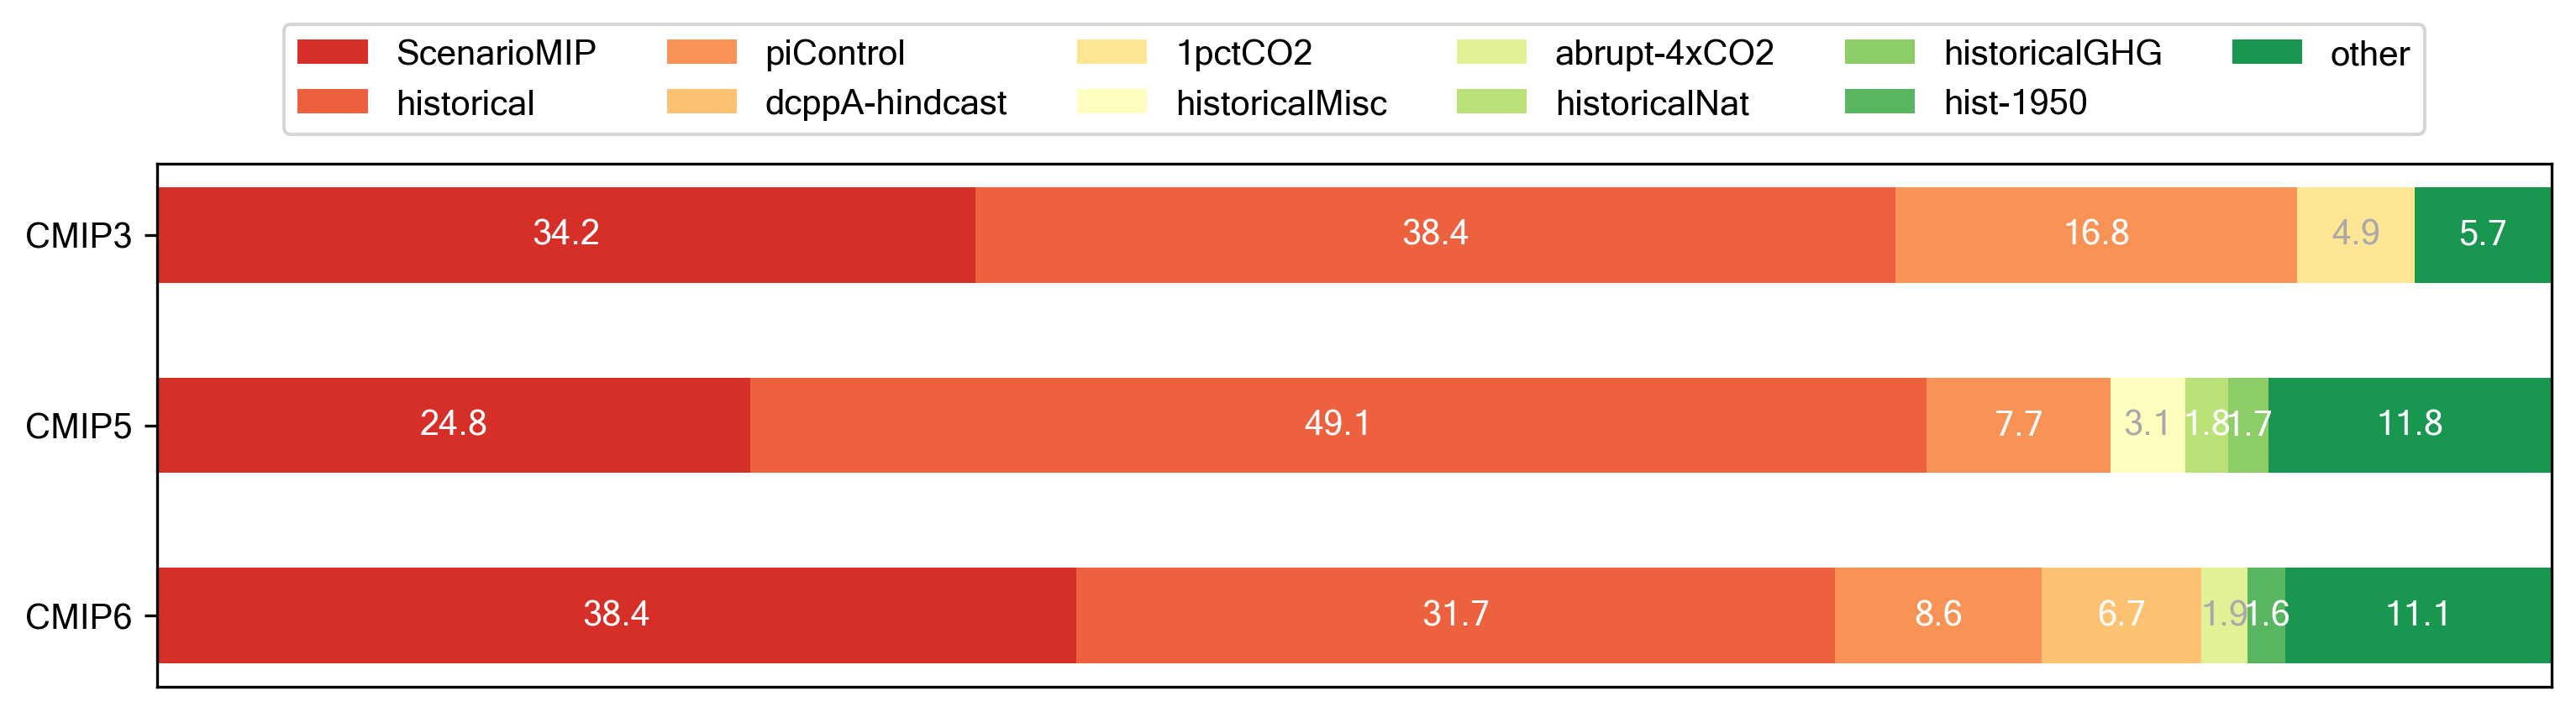

In [13]:
fontName = "Microsoft Sans Serif"
fontSize = 10
dataKeys = list(data2.keys())
dataNp = np.array(list(data2.values()))
dataCumul = dataNp.cumsum(axis=1)
labelColours = plt.colormaps["RdYlGn"](np.linspace(0.15, 0.85, dataNp.shape[1]))
labelColours = plt.colormaps["RdYlGn"](np.linspace(0.1, 0.9, dataNp.shape[1]))

fig, ax = plt.subplots(figsize=(10.5, 3), dpi=300)  # 8.5 x 11 inches US letter
ax.invert_yaxis()
ax.xaxis.set_visible(False)
plt.yticks(fontname=fontName)
ax.set_xlim(0, np.sum(dataNp, axis=1).max())

for i, (colname, color) in enumerate(zip(labels2, labelColours)):
    widths = dataNp[:, i]
    starts = dataCumul[:, i] - widths
    rects = ax.barh(
        dataKeys, widths, left=starts, height=0.5, label=colname, color=color
    )
    # remove 0 labels
    tmp = copy.deepcopy(rects.datavalues)
    tmp[tmp == 0] = np.nan
    rects.datavalues = tmp
    r, g, b, _ = color
    text_color = "white" if r * g * b < 0.4 else "darkgrey"
    ax.bar_label(rects, label_type="center", color=text_color, fontname=fontName)

ax.legend(
    ncols=6,
    bbox_to_anchor=(0.5, 1.3),
    loc="upper center",
    prop={"family": fontName, "size": fontSize},
)  # fontsize='small',

# fill canvas
fig.tight_layout()

# display, save, and close
plt.show()
fig.savefig("_".join([timeFormat, "Fig5.svg"]), format="svg")

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure 6: A time history of MIPs and their broader impact <a class="anchor" id="fig6"></a>¶

In [14]:
import base64
from IPython.display import IFrame, HTML

# set PDF path and open
pdf_path = r"241126T171500_Fig6.pdf"
with open(pdf_path, "rb") as pdf:
    content = pdf.read()
# encode PDF
base64_pdf = base64.b64encode(content).decode("utf-8")
# display encoded PDF
IFrame(f"data:application/pdf;base64,{base64_pdf}", width=1084, height=542)

# Cleaner options
# https://sentry.io/answers/how-do-i-display-a-base64-image-in-html/
# https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
# iframe_html = """
# <iframe img=f"data:application/pdf;base64,{base64_pdf}" width="100%" height="542"></iframe>
# """
# HTML(iframe_html)

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure A1: Recorded downloads by MIP across three phases of CMIP <a class="anchor" id="figA1"></a>

### tabulate input data

| MIP phase | experiment/experiment count | MIP id | Download #'s % |
| --- | --- | :---: | :---: |
| CMIP3 | historical (20C3M) | CMIP/DECK | 38.4 |
| CMIP3 | SRESA1B | ScenarioMIP | 20.5 |
| CMIP3 | piControl (picntrl) | CMIP/DECK | 16.8 |
| CMIP3 | SRESB1 | ScenarioMIP | 6.9 |
| CMIP3 | SRESA2 | ScenarioMIP | 6.8 |
| CMIP3 | 1pctCO2 (1pctto2x) | CMIP/DECK | 4.9 |
| CMIP3 | 1pctCO2 (1pctto4x) | CMIP/DECK | 2.2 |
| CMIP3 | commit | ScenarioMIP | 1.1 |
| CMIP3 | amip | CMIP/DECK | 0.8 |
| CMIP3 | pdcntrl | CMIP/DECK | 0.7 |
| CMIP3 | 2xco2 | CFMIP | 0.4 |
| CMIP3 | slabcntl | CFMIP | 0.4 |
| CMIP3 | 3 experiment cumulative | ScenarioMIP | 34.2 |
| CMIP3 | other (excluding top 6 experiments) | CMIP/DECK, ScenarioMIP, CFMIP | 5.7 |
| CMIP3 | 12 | ESGF published experiments | |
| | | | |
| CMIP5 | 5 | CMIP/DECK | 61.2 |
| CMIP5 | 4 | ScenarioMIP | 24.8 |
| CMIP5 | 4 | DAMIP | 7.0 |
| CMIP5 | 65 | DCPP | 3.2 |
| CMIP5 | 3 | PMIP | 1.7 |
| CMIP5 | 9 | CFMIP | 1.1 |
| CMIP5 | 7 | C4MIP | 0.8 |
| CMIP5 | 4 | RFMIP | 0.1 |
| CMIP5 | other (excluding top 4 MIPs) | PMIP, C4MIP, CFMIP, RFMIP | 3.8 |
| CMIP5 | 37 | ESGF published experiments (101 including DCPP sub-experiment variants) | |
| | | | |
| CMIP6 | 12 | CMIP/DECK | 44.6 |
| CMIP6 | 11 | ScenarioMIP | 38.4 |
| CMIP6 | 24 | DCPP | 7.2 |
| CMIP6 | 6 | HighResMIP | 4.2 |
| CMIP6 | 21 | PAMIP | 1.4 |
| CMIP6 | 21 | DAMIP | 1.1 |
| CMIP6 | 6 | PMIP | 0.8 |
| CMIP6 | 39 | AerChemMIP | 0.6 |
| CMIP6 | 12 | C4MIP | 0.5 |
| CMIP6 | 18 | LUMIP | 0.3 |
| CMIP6 | 16 | RFMIP | 0.3 |
| CMIP6 | 4 | OMIP | 0.2 |
| CMIP6 | 9 | LS3MIP | 0.2 |
| CMIP6 | 24 | CFMIP | 0.1 |
| CMIP6 | 4 | GeoMIP | 0.1 |
| CMIP6 | 7 | CDRMIP | 0 |
| CMIP6 | 8 | FAFMIP | 0 |
| CMIP6 | 6 | GMMIP | 0.0 |
| CMIP6 | 4 | VolMIP | 0.0 |
| CMIP6 | 5 | ISMIP6 | 0.0 |
| CMIP6 | other (excluding top 4 MIPs) | PAMIP, DAMIP, PMIP, AerChemMIP, C4MIP, LUMIP, RFMIP, OMIP, LS3MIP, CFMIP, GeoMIP, CDRMIP, FAFMIP, GMMIP, VolMIP, ISMIP6 | 5.6 |
| CMIP6 | 257 | ESGF published experiments | |

### define input data

In [15]:
# Cutoff >=4.5%
data1 = {
    "CMIP3": [38.4, 20.5, 16.8, 6.9, 6.8, 4.9, 5.7],  # = 100
    "CMIP5": [61.2, 24.8, 7.0, 3.2, 3.8],  # = 100
    "CMIP6": [44.6, 38.4, 7.2, 4.2, 5.6],  # = 100
}
labelsCm3 = [
    "historical 38.4%",
    "SRESA1B 20.5%",
    "piControl 16.8%",
    "SRESB1 6.9%",
    "SRESA2 6.8%",
    "1pctCO2 4.9%",
    "other 5.7%",
]
labelsCm5 = [
    "CMIP/DECK 61.2%",
    "ScenarioMIP 24.8%",
    "DAMIP 7.0%",
    "DCPP 3.2%",
    "other 3.8%",
]  # = 100
labelsCm6 = [
    "CMIP/DECK 44.6",
    "ScenarioMIP 38.4%",
    "DCPP 7.2%",
    "HighResMIP 4.2%",
    "other 5.6%",
]  # = 100

### plot

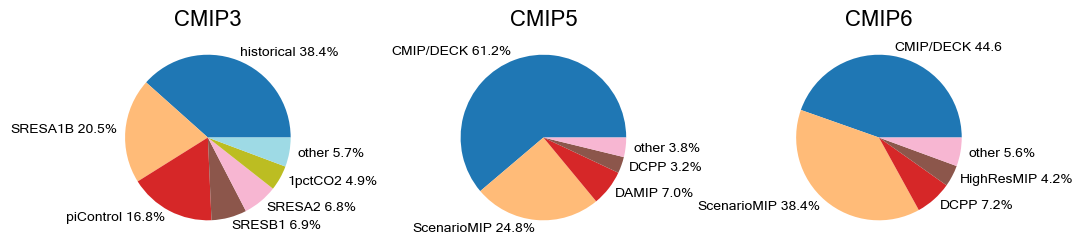

In [16]:
# Set fonts and sizes
fontName = "Microsoft Sans Serif"
fontSize = 16
# select colourmap
cmap = plt.get_cmap("tab20")

# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(10.75, 3))

# Plot the first pie chart
axes[0].pie(
    data1["CMIP3"],
    labels=labelsCm3,
    textprops={"fontname": fontName},
    colors=cmap(np.linspace(0, 1, len(data1["CMIP3"]))),
)  # , autopct='%1.1f%%')
axes[0].set_title("CMIP3", fontname=fontName, fontsize=fontSize)

# Plot the second pie chart
axes[1].pie(
    data1["CMIP5"],
    labels=labelsCm5,
    textprops={"fontname": fontName},
    colors=cmap(np.linspace(0, 1, len(data1["CMIP3"]))),
)
axes[1].set_title("CMIP5", fontname=fontName, fontsize=fontSize)

# Plot the third pie chart
axes[2].pie(
    data1["CMIP6"],
    labels=labelsCm6,
    textprops={"fontname": fontName},
    colors=cmap(np.linspace(0, 1, len(data1["CMIP3"]))),
)
axes[2].set_title("CMIP6", fontname=fontName, fontsize=fontSize)

# fill canvas
fig.tight_layout()

# display, save, and close
plt.show()
fig.savefig("_".join([timeFormat, "FigA1.svg"]), format="svg")

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure B1: Plot of data growth across MIP phases <a class="anchor" id="figB1"></a>

### tabulate input data

Latest data from [CMCC Published data over the federation (241209)](http://esgf-ui.cmcc.it/esgf-dashboard-ui/federated-view.html)

| MIP phase | data size (machine readable) | data size (distinct) | data size (replicated) |
| --- | :---: | :---: | :---: |
| AMIP1 | 1e9 | 1 GB | 0 GB |
| AMIP2 | 5e11 | 0.5 TB | 0 GB |
| CMIP1 | 1e9 | 1 GB | 0 GB |
| CMIP2 | 5e11 | 0.5 TB | 0 TB |
| CMIP3 | 39e12 | 39 TB | 0 TB |
| CMIP5 | 1.5e15 | 1,525.07 TB | 3,768.55 TB |
| CMIP6 | 16.0e15 | 15,953.41 TB | 11,493.2 TB |

/var/folders/7d/rkhc67xs5w70chjmlrr6pv440017ch/T/ipykernel_44299/1521701702.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes.axes.set_yticklabels(ax.get_yticklabels(), fontsize=fontSize, fontname=fontName)


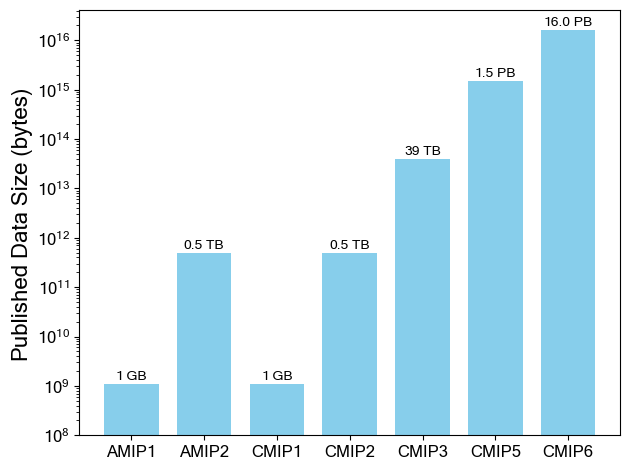

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# plot characteristics
# Colours
# https://how2matplotlib.com/matplotlib-bar-colors.html
# https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
# https://e2eml.school/matplotlib_ticks
width = 0.75  # bar width
# Set fonts and sizes
fontName = "Microsoft Sans Serif"
fontSize = 12
fontSizeLab = 10
fontSizeAxLab = 16

data = (1e9, 5e11, 1e9, 5e11, 39e12, 1.5e15, 16.0e15)
dataLabels = {}
dataLabels["AMIP1"] = "1 GB"
dataLabels["AMIP2"] = "0.5 TB"
dataLabels["CMIP1"] = "1 GB"
dataLabels["CMIP2"] = "0.5 TB"
dataLabels["CMIP3"] = "39 TB"
dataLabels["CMIP5"] = "1.5 PB"
dataLabels["CMIP6"] = "16.0 PB"

fig, ax = plt.subplots()
x = np.arange(len(data))
ax.bar(x, data, width, bottom=1e8, color="skyblue")

# Set plot formatting
ax.set_xticks(x, labels=dataLabels, fontsize=fontSize, fontname=fontName)
ax.set_yscale("log")
ax.set_ylabel("Published Data Size (bytes)", fontsize=fontSizeAxLab, fontname=fontName)
ax.axes.axes.set_yticklabels(ax.get_yticklabels(), fontsize=fontSize, fontname=fontName)


# define overplot labels
def addlabels(labDic, data):
    mipKeys = list(labDic.keys())
    for i in range(len(labDic)):
        mipLab = mipKeys[i]
        mipSizeLab = labDic[mipLab]
        if mipSizeLab == "1 GB":
            plt.text(
                i,
                data[i] * 1.3,
                mipSizeLab,
                ha="center",
                fontsize=fontSizeLab,
                fontname=fontName,
            )
        else:
            plt.text(
                i,
                data[i] * 1.2,
                mipSizeLab,
                ha="center",
                fontsize=fontSizeLab,
                fontname=fontName,
            )


addlabels(dataLabels, data)

# fill canvas
fig.tight_layout()

# display, save, and close
plt.show()
fig.savefig("_".join([timeFormat, "FigB1.svg"]), format="svg")
fig.savefig("_".join([timeFormat, "FigB1.png"]), dpi=300)